In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pylab as pylab

In [87]:
df_house = pd.read_csv("../../Data/CleanData/house_processed-dataset.csv")

## Các hàm thường dùng

In [88]:
# hàm vẽ biểu đồ trực quan so sánh sự ảnh hưởng của các yếu tố đến giá nhà
def scatter(x, use_log=True):
    plt.figure(figsize=(8,6))

    if use_log:
        X = np.log1p(df_house[x])
        Y = np.log1p(df_house['MucGia'])
        plt.xlabel('log ' + x)
        plt.ylabel('log MucGia')
    else:
        X = df_house[x]
        Y = df_house['MucGia']
        plt.xlabel(x)
        plt.ylabel('MucGia')

    plt.scatter(X, Y)
    plt.title(x + ' vs Muc Gia')
    plt.show()

def boxplot(x, use_log=True, mapping=None, order=None):
    plt.figure(figsize=(8,6))
    
    # Nếu có mapping thì thay thế bằng nhãn
    if mapping is not None:
        df_plot = df_house.copy()
        df_plot[x] = df_plot[x].map(mapping)
    else:
        df_plot = df_house

    # Vẽ boxplot
    if use_log:
        sns.boxplot(
            x=df_plot[x], 
            y=np.log1p(df_plot['MucGia']),
            order=order
        )
        plt.ylabel('log MucGia')
    else:
        sns.boxplot(
            x=df_plot[x], 
            y=df_plot['MucGia'],
            order=order
        )
        plt.ylabel('MucGia')

    plt.xlabel(x)
    plt.title('Boxplot of ' + x + ' vs MucGia')
    plt.xticks(rotation=90)
    plt.show()


## Trực quan hóa Diện tích

In [89]:
df_house['DienTich'].describe()

count    36633.000000
mean       104.089874
std        138.343920
min          7.000000
25%         51.000000
50%         76.000000
75%        114.000000
max       8534.600000
Name: DienTich, dtype: float64

In [90]:
bins = [7, 51, 76, 114, 8534]
phan_hoa_dien_tich = df_house['DienTich'].value_counts(bins=bins).sort_index()
phan_hoa_dien_tich

(6.999, 51.0]      9274
(51.0, 76.0]       9190
(76.0, 114.0]      9014
(114.0, 8534.0]    9154
Name: count, dtype: int64

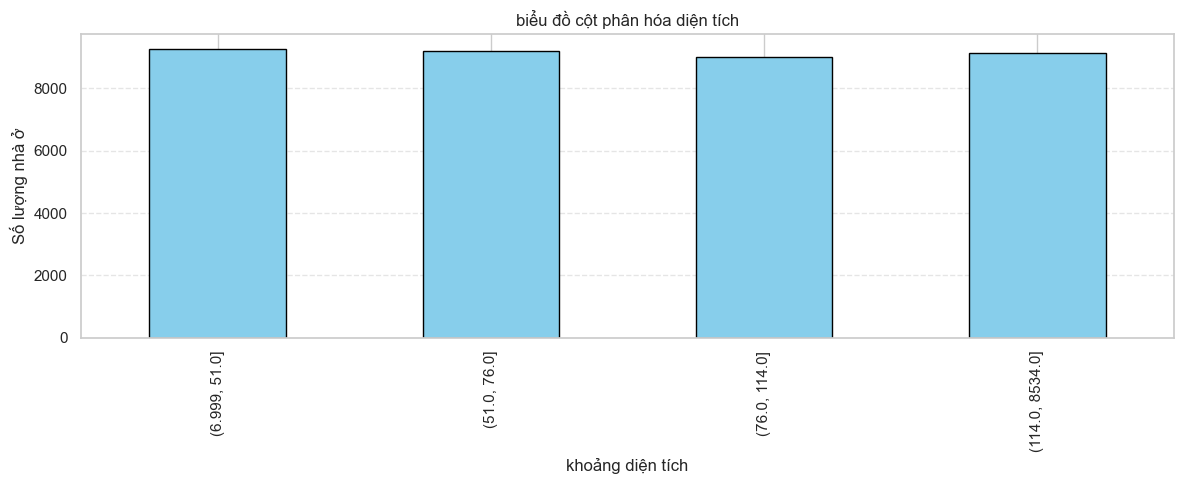

In [91]:
phan_hoa_dien_tich.plot(kind='bar', figsize=(12,5), color='skyblue', edgecolor='black')
plt.xlabel('khoảng diện tích')
plt.ylabel('Số lượng nhà ở')
plt.title('biểu đồ cột phân hóa diện tích')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [92]:
df_house['DienTich'].mode()

0    100.0
Name: DienTich, dtype: float64

Nhận xét tổng quan:
* Trung bình diện tích của những căn nhà là khoảng 104.09 mét vuông
* Thấp nhất là 7 mét vuông
* Cao nhất là 8534.6 mét vuông
* diện tích có sự phân tán mạnh do sự chênh lệch diện tích giữ nhà ở bình thường với các căn biệt thự có diện tích rất lớn
* Căn nhà có diện tích được ưa chuộng nhất là các căn có diện tích 100 mét vuông

Nhân xét phân hóa diện tích:
* Sự phân hóa số lượng nhà trong các khoảng diện tích gần như tương đồng nhau, trong đó khoảng diện tích 7 - 51 mét vuông là có số lượng nhà nhiều nhất: 9274 căn nhà.

## So sánh sự ảnh hưởng của diện tích đến giá nhà

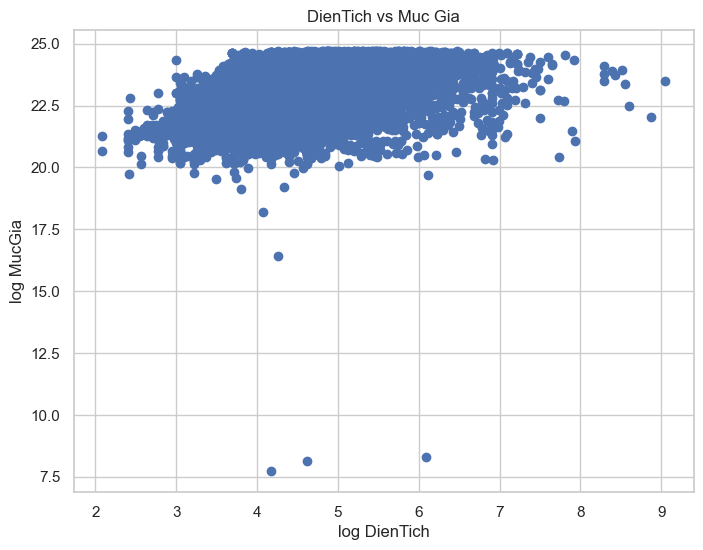

In [93]:
# biểu đồ so sánh diện tích và mức giá (dùng log1p)
scatter('DienTich', use_log=True)

nhận xét:
* Mối quan hệ giữa diện tích và giá có xu hướng tăng tuyến tính nhẹ, nhưng không phải yếu tố quyết định chính.

## Trực quan hóa mặt tiền

In [94]:
df_house['MatTien'].describe()

count    22905.000000
mean         6.226198
std          4.369680
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max        265.000000
Name: MatTien, dtype: float64

In [95]:
bins = [1, 4, 5, 7, 265]
phan_hoa_mat_tien = df_house['MatTien'].value_counts(bins=bins).sort_index()
phan_hoa_mat_tien

(0.999, 4.0]    5994
(4.0, 5.0]      7051
(5.0, 7.0]      4960
(7.0, 265.0]    4900
Name: count, dtype: int64

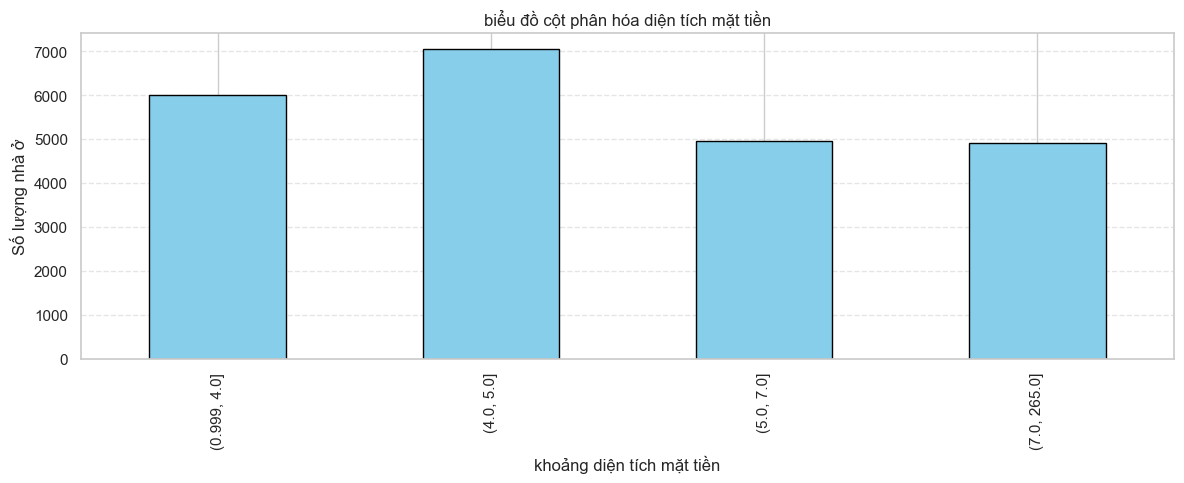

In [96]:
phan_hoa_mat_tien.plot(kind='bar', figsize=(12,5), color='skyblue', edgecolor='black')
plt.xlabel('khoảng diện tích mặt tiền')
plt.ylabel('Số lượng nhà ở')
plt.title('biểu đồ cột phân hóa diện tích mặt tiền')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [97]:
df_house['MatTien'].mode()

0    5.0
Name: MatTien, dtype: float64

Nhận xét tổng quan:
* Trung bình diện tích mặt tiền của những căn nhà là khoảng 6.23 mét vuông
* Thấp nhất là 1 mét vuông
* Cao nhất là 265 mét vuông
* Độ lệch chuẩn 4.37 cho thấy diện tích mặt tiền tương đối phân tán. Nhưng vẫn tập chung quanh mức ổn định.
* Căn nhà có diện tích mặt tiền được ưa chuộng nhất là các căn có diện tích mặt tiền 5 mét vuông

Nhận xét phân hóa diện tích mặt tiền:
* Sự phân hóa số lượng nhà ở trong các khoảng diện tích mặt tiền có sự chênh lệch, đa số tập trung nhiều ở mức diện tích mặt tiền thấp, trong đó khoảng diện tích trên 4 mét - 5 mét vuông là có số lượng nhà nhiều nhất: 7051 căn nhà.

## So sánh sự ảnh hưởng của diện tích mặt tiền đến giá nhà

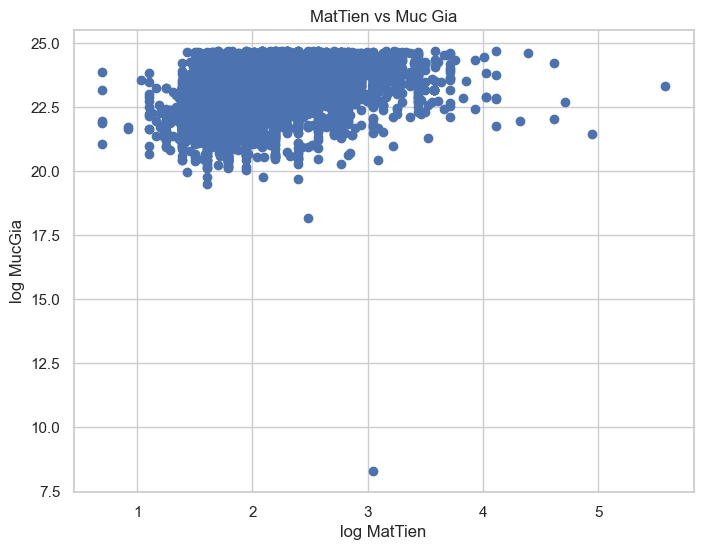

In [98]:
# biểu đồ so sánh diện tích mặt tiền và mức giá (dùng log1p)
scatter('MatTien', use_log=True)

nhận xét:
* Giá trị log(Mức Giá) tập trung nhiều quanh mức 20 → 23 (khoảng giá trị thực tế rất cao, hàng chục đến hàng trăm tỷ).
* Có xu hướng tích cực nhẹ: khi diện tích Mặt Tiền tăng, Mức Giá cũng tăng, nhưng mối quan hệ không rõ rệt.

=> vẫn còn 1 vài điểm outlier nhưng nhìn chung có thể kết luận mặt tiền rộng hơn thường gắn liền với giá cao hơn.

## Trực quan hóa đường vào

In [99]:
df_house['DuongVao'].describe()

count    18186.000000
mean        11.058509
std         12.635619
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max        800.000000
Name: DuongVao, dtype: float64

In [100]:
bins = [1, 5, 8, 13, 800]
phan_hoa_duong_vao = df_house['DuongVao'].value_counts(bins=bins).sort_index()
phan_hoa_duong_vao

(0.999, 5.0]     5774
(5.0, 8.0]       4491
(8.0, 13.0]      3397
(13.0, 800.0]    4524
Name: count, dtype: int64

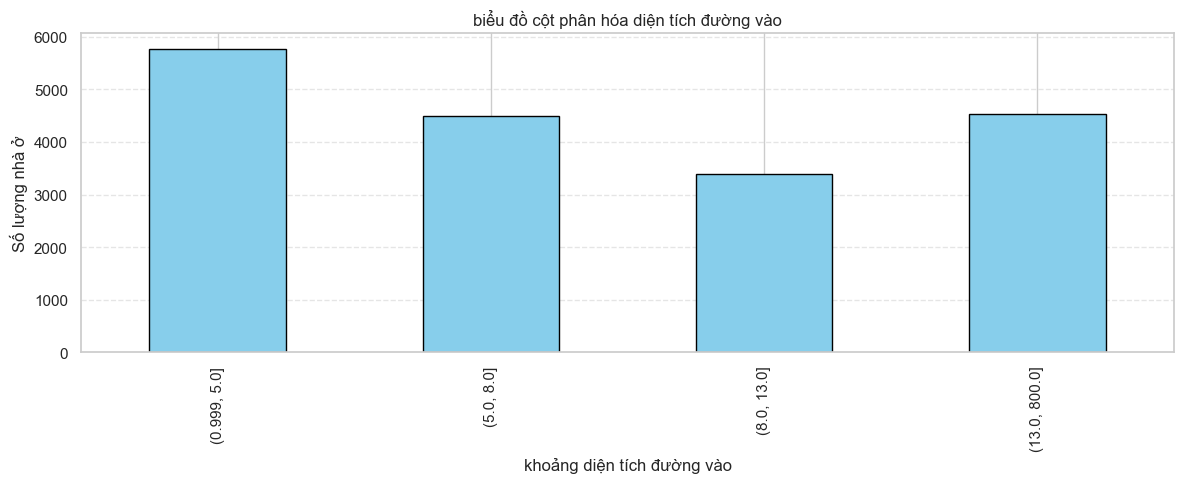

In [101]:
phan_hoa_duong_vao.plot(kind='bar', figsize=(12,5), color='skyblue', edgecolor='black')
plt.xlabel('khoảng diện tích đường vào')
plt.ylabel('Số lượng nhà ở')
plt.title('biểu đồ cột phân hóa diện tích đường vào')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [102]:
df_house['DuongVao'].mode()

0    6.0
Name: DuongVao, dtype: float64

Nhận xét tổng quan:
* Trung bình diện tích đường vào của những căn nhà là khoảng 11.06 mét vuông
* Thấp nhất là 1 mét vuông
* Cao nhất là 800 mét vuông
* Độ lệch chuẩn 12.64 cho thấy diện tích đường vào phân tán rất lớn, không đồng đều.
* diện tích đường vào xuất hiện nhiều nhất là 6 mét vuông

Nhận xét phân hóa diện tích mặt tiền:
* Sự phân hóa số lượng nhà ở trong các khoảng diện tích đường vào có sự chênh lệch, đa số tập trung nhiều ở mức diện tích đường vào thấp, trong đó khoảng diện tích 1 mét - 5 mét vuông là có số lượng nhà nhiều nhất: 5774 căn nhà. tiếp theo là trên 5 - 8 mét vuông và 13 - 800 mét vuông có số lượng nhà gần như bằng nhau. Cuối cùng là trên 8 - 13 mét có số lượng nhà ít nhất: 3397 mét vuông

## So sánh sự ảnh hưởng của diện tích đường vào đến giá nhà

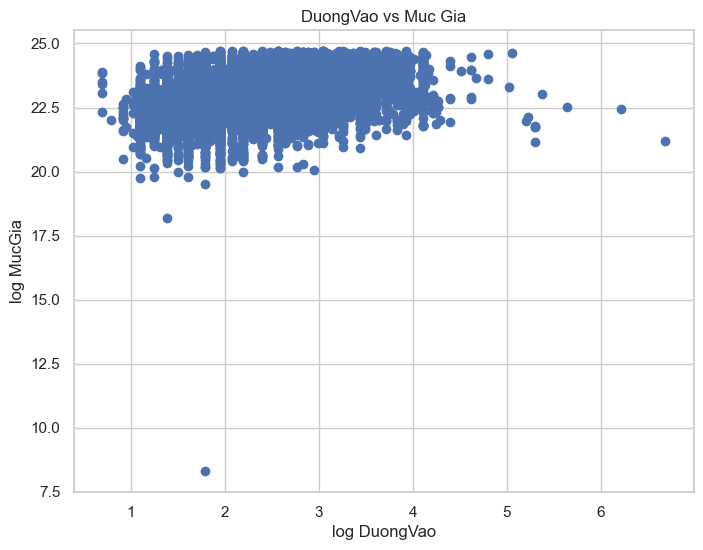

In [103]:
# biểu đồ so sánh diện tích đường vào và mức giá (dùng log1p)
scatter('DuongVao', use_log=True)

Nhận xét:
* Không có quan hệ tuyến tính rõ ràng:
* Giá không tăng đều khi diện tích đường vào lớn hơn.
* Ở mức đường vào rộng, giá có xu hướng phân tán nhiều hơn.

=> Đường vào rộng có thể góp phần làm tăng giá, nhưng không nhiều và chỉ là yếu tố phụ

## trực quan hóa số tầng

In [104]:
df_house['SoTang'].describe()

count    31444.000000
mean         3.962409
std          1.673863
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         24.000000
Name: SoTang, dtype: float64

In [105]:
bins = [1, 3, 4, 5, 24]
phan_hoa_so_tang = df_house['SoTang'].value_counts(bins=bins).sort_index()
phan_hoa_so_tang

(0.999, 3.0]    12635
(3.0, 4.0]       7582
(4.0, 5.0]       6769
(5.0, 24.0]      4458
Name: count, dtype: int64

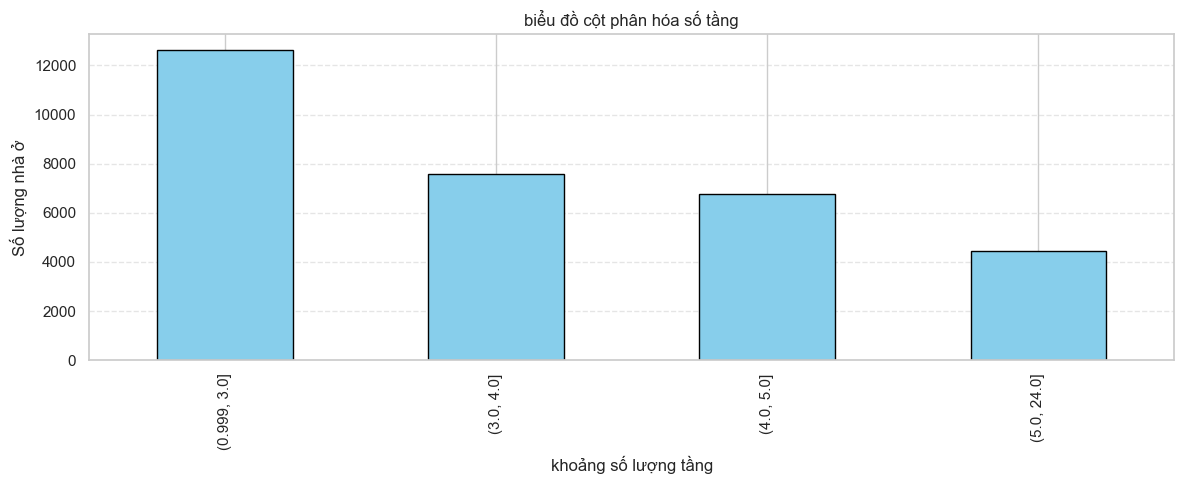

In [106]:
phan_hoa_so_tang.plot(kind='bar', figsize=(12,5), color='skyblue', edgecolor='black')
plt.xlabel('khoảng số lượng tầng')
plt.ylabel('Số lượng nhà ở')
plt.title('biểu đồ cột phân hóa số tầng')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [107]:
df_house['SoTang'].mode()

0    4.0
Name: SoTang, dtype: float64

Nhận xét tổng quan:
* Trung bình số tầng của các căn nhà khoảng 4 tầng
* Thấp nhất là các căn nhà 1 tầng
* Cao nhất là 24 tầng (có thể là các tòa nhà thương mại)
* Độ lệch chuẩn 1.67 tương đối thấp, dữ liệu số tầng khá tập trung, không quá phân tán. Điều này cho thấy số tầng nhà ở Việt Nam trong dữ liệu khá ổn định, chủ yếu tập trung quanh 3–5 tầng.

Nhận xét phân hóa số tầng căn nhà:
* Nhà thấp tầng (1–3 tầng) chiếm ưu thế tuyệt đối trong dữ liệu.

→ Phù hợp với thực tế ở Việt Nam, đa số nhà phố, nhà riêng thường có ≤ 3 tầng.

* Nhà từ 4–5 tầng chiếm tỷ lệ thấp hơn đáng kể, nhưng vẫn có một số lượng nhất định.

→ Thường thấy ở nhà mặt phố lớn, nhà cho thuê hoặc văn phòng nhỏ.

* Nhà cao tầng (>5 tầng) ít gặp trong dữ liệu.

→ Đây có thể là tòa nhà văn phòng, hoặc công trình đặc thù.

## So sánh sự ảnh hưởng của số tầng đến giá nhà

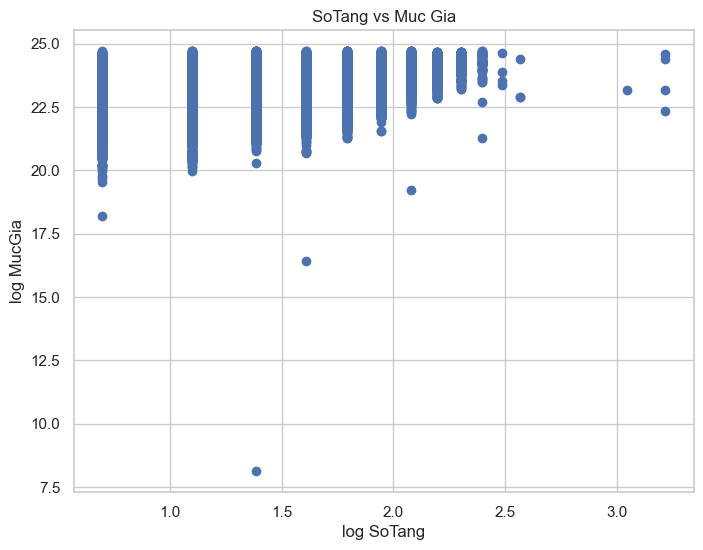

In [108]:
# biểu đồ so sánh số tầng và mức giá (dùng log1p)
scatter('SoTang', use_log=True)

Nhận xét:
* Không thấy xu hướng tuyến tính rõ ràng: số tầng tăng không kéo theo giá tăng rõ rệt.
* Ở cùng một số tầng, mức giá vẫn biến động mạnh (cột dọc dày đặc).
* Tuy nhiên, có xu hướng nhà nhiều tầng hơn (SoTang cao) có thể nằm ở mức giá cao hơn - các cụm bên phải thường có log MucGia khá cao (~23–25).

=> Mối quan hệ giữa số tầng và giá tồn tại nhưng yếu, không phải là yếu tố quyết định chính.


## trực quan hóa số phòng ngủ

In [109]:
df_house['SoPhongNgu'].describe()

count    36633.000000
mean         5.155843
std          4.886614
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max        160.000000
Name: SoPhongNgu, dtype: float64

In [110]:
bins = [0, 3, 4, 6, 160]
phan_hoa_so_phong_ngu = df_house['SoPhongNgu'].value_counts(bins=bins).sort_index()
phan_hoa_so_phong_ngu

(-0.001, 3.0]    13713
(3.0, 4.0]        8490
(4.0, 6.0]        7317
(6.0, 160.0]      7113
Name: count, dtype: int64

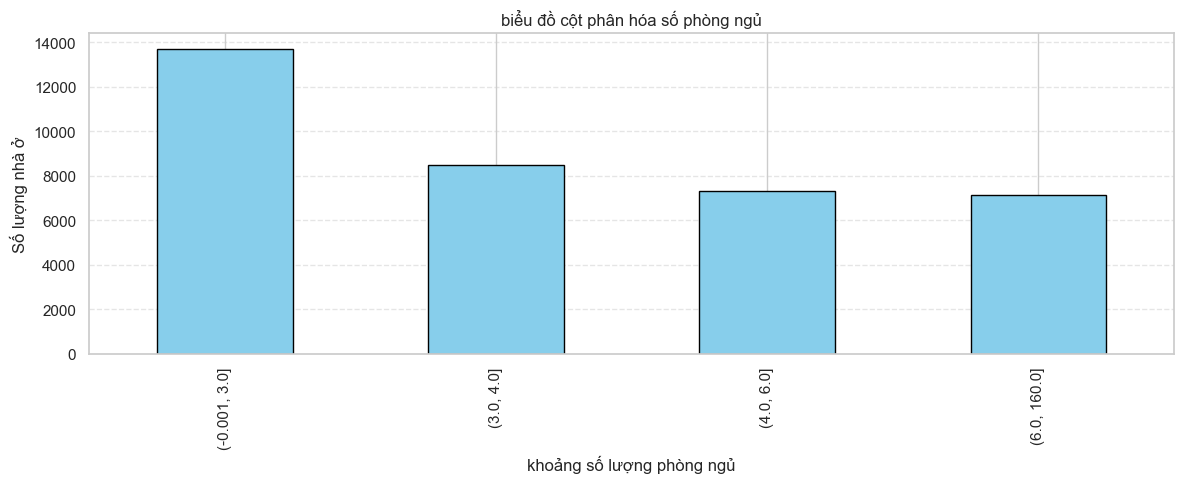

In [111]:
phan_hoa_so_phong_ngu.plot(kind='bar', figsize=(12,5), color='skyblue', edgecolor='black')
plt.xlabel('khoảng số lượng phòng ngủ')
plt.ylabel('Số lượng nhà ở')
plt.title('biểu đồ cột phân hóa số phòng ngủ')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [112]:
df_house['SoPhongNgu'].mode()

0    4
Name: SoPhongNgu, dtype: int64

Nhận xét tổng quan:
* Trung bình số phòng ngủ của các căn nhà khoảng 5 phòng ngủ
*  Xuất hiện căn nhà 0 phòng ngủ
* Cao nhất là 160 phòng ngủ
* Độ lệch chuẩn khoảng 5 gần bằng trung bình chứng tỏ có nhiều giá trị nằm xa trung tâm

Nhận xét phân hóa số phòng ngủ của căn nhà:
* Nhà có 0–3 phòng ngủ chiếm đa số:
* Chiếm 13713 căn
* Điều này phản ánh nhu cầu phổ biến của thị trường (hộ gia đình nhỏ, căn hộ chung cư, nhà phố vừa).
* Số lượng nhà 4 phòng ngủ giảm rõ rệt (8490 căn nhà):
* Cho thấy ít dự án/nhà ở xây dựng loại này hơn, phù hợp cho gia đình đông người.
* Nhà 5–6 phòng ngủ (7317 căn) và từ 7 phòng ngủ trở lên (7113 căn) tương đối ít:
* Đây có thể là phân khúc biệt thự, nhà phố lớn, không phổ biến.
* Giá trị bất động sản ở nhóm này thường cao, đối tượng khách hàng đặc thù.

## So sánh sự ảnh hưởng của số phòng ngủ đến giá nhà

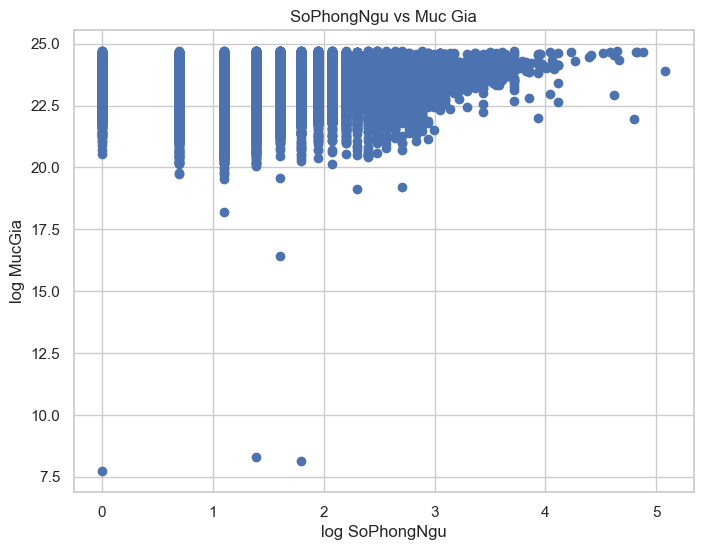

In [113]:
# biểu đồ so sánh số phòng ngủ và mức giá (dùng log1p)
scatter('SoPhongNgu', use_log=True)

Nhận xét:
* Nhìn chung, số phòng ngủ càng nhiều (log SoPhongNgu tăng), mức giá (log MucGia) có xu hướng tăng nhẹ.
* Tuy nhiên, quan hệ này không hoàn toàn tuyến tính, mà có sự phân tán khá lớn.

## Trực quan hóa số Toilet

In [114]:
df_house['SoToilet'].describe()

count    36633.000000
mean         5.063686
std          4.915947
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max        180.000000
Name: SoToilet, dtype: float64

In [115]:
bins = [0, 3, 4, 6, 180]
phan_hoa_so_toilet = df_house['SoToilet'].value_counts(bins=bins).sort_index()
phan_hoa_so_toilet

(-0.001, 3.0]    14493
(3.0, 4.0]        6998
(4.0, 6.0]        7565
(6.0, 180.0]      7577
Name: count, dtype: int64

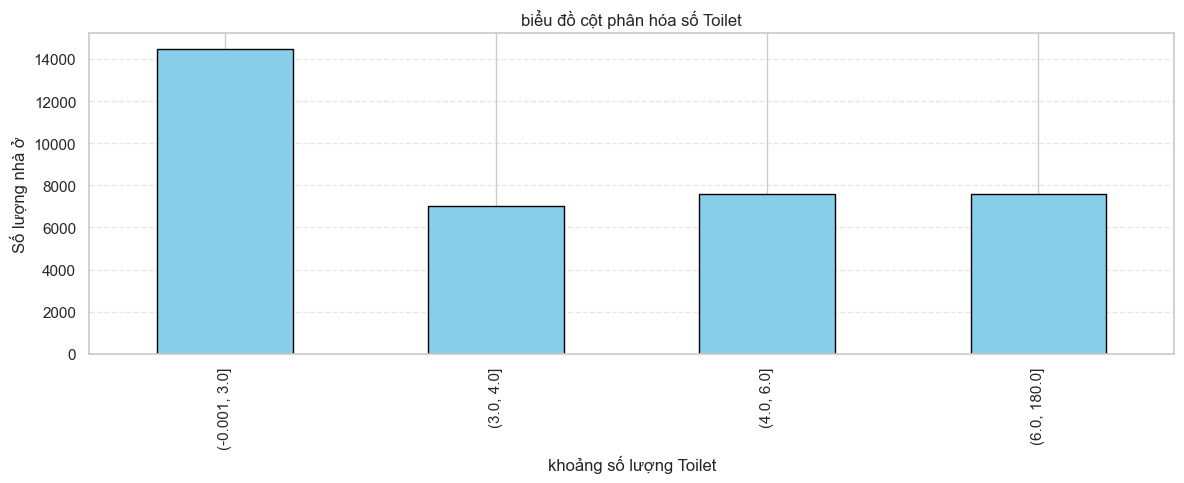

In [116]:
phan_hoa_so_toilet.plot(kind='bar', figsize=(12,5), color='skyblue', edgecolor='black')
plt.xlabel('khoảng số lượng Toilet')
plt.ylabel('Số lượng nhà ở')
plt.title('biểu đồ cột phân hóa số Toilet')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [117]:
df_house['SoToilet'].mode()

0    4
Name: SoToilet, dtype: int64

Nhận xét tổng quan:
* Trung bình số Toilet của các căn nhà khoảng 5 số toilet
* Thấp nhất là căn nhà: không có toilet
* Cao nhất là 180 phòng toilet
* So với giá trị trung bình 5.06, độ lệch chuẩn gần bằng 97% của mean → biến động dữ liệu rất lớn.

Nhận xét phân hóa số Toilet của căn nhà:
* Khoảng 0 – 3 toilet: 14493 căn (nhiều nhất) → phần lớn nhà ở phổ thông.
* Khoảng trên 3 – 4 toilet: 6998 căn → nhóm nhà ở khá, có nhiều phòng vệ sinh hơn.
* Khoảng trên 4 – 6 toilet: 7565 căn → nhóm nhà ở rộng hơn, có thể là biệt thự hoặc nhà nhiều tầng.
* Khoảng trên 6 – 180 toilet: 7577 căn → nhóm có số toilet rất cao, nhiều khả năng gồm các dự án tòa nhà văn phòng, khách sạn.

## So sánh sự ảnh hưởng của số toilet đến giá nhà

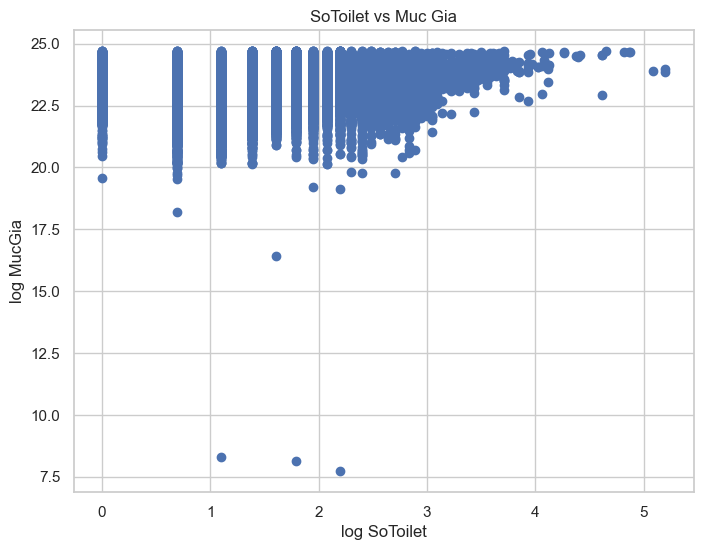

In [118]:
# biểu đồ so sánh số toilet và mức giá (dùng log1p)
scatter('SoToilet', use_log=True)

Nhận xét:
* Các căn có số toilet rất ít (0–1) thì giá nhà thường thấp hơn (một số điểm dưới mức log giá ~15).
* Khi số toilet ≥ 2, mức giá tập trung ở vùng log MucGia từ 20–23, tức là giá ổn định ở mức trung bình–cao.
* Khi số toilet tăng nhiều (3–5 toilet trở lên), giá nhà có xu hướng tăng thêm, nhưng không tăng mạnh.

=> Số toilet có ảnh hưởng tích cực đến giá nhà, nhưng chỉ là yếu tố phụ.

## Trực quan hóa hướng nhà

In [119]:
df_house['HuongNha'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 36633 entries, 0 to 36632
Series name: HuongNha
Non-Null Count  Dtype
--------------  -----
36633 non-null  int64
dtypes: int64(1)
memory usage: 286.3 KB


C:\Users\quanp\AppData\Local\Temp\ipykernel_19872\3066470779.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


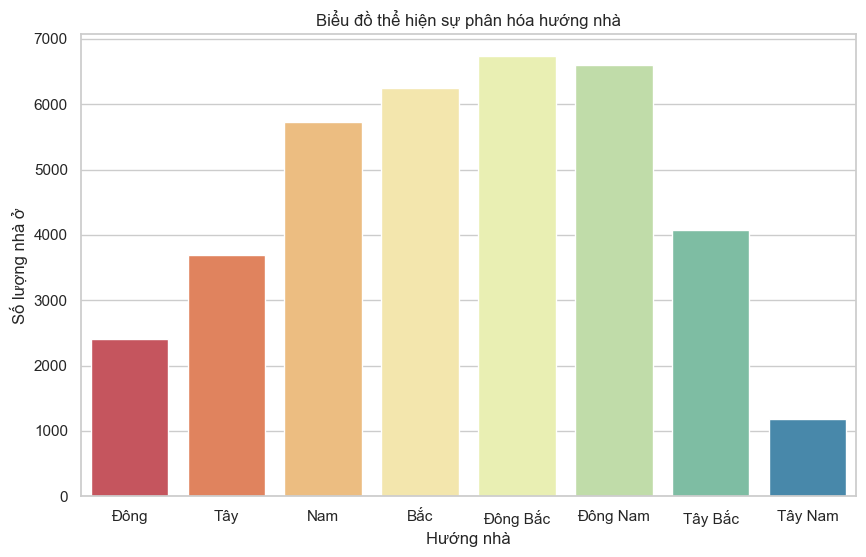

In [120]:
# Tính số lượng theo hướng nhà
HuongNha_counts = df_house['HuongNha'].value_counts().reset_index()
HuongNha_counts.columns = ['HuongNha', 'Count']

# Map số → tên hướng
mapping = {
    1: 'Đông',
    2: 'Tây',
    3: 'Nam',
    4: 'Bắc',
    5: 'Đông Bắc',
    6: 'Đông Nam',
    7: 'Tây Bắc',
    8: 'Tây Nam'
}
HuongNha_counts['HuongNhaLabel'] = HuongNha_counts['HuongNha'].map(mapping)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

ax = sns.barplot(
    x='HuongNhaLabel',
    y='Count',
    data=HuongNha_counts,
    palette='Spectral',
    order=['Đông','Tây','Nam','Bắc','Đông Bắc','Đông Nam','Tây Bắc','Tây Nam'] 
)

plt.xlabel('Hướng nhà')
plt.ylabel('Số lượng nhà ở')
plt.title('Biểu đồ thể hiện sự phân hóa hướng nhà')
plt.show()

In [121]:
# Đếm số lượng từng hướng
counts = df_house['HuongNha'].value_counts().sort_index()

# Map số sang tên hướng
mapping = {
    1: 'Đông',
    2: 'Tây',
    3: 'Nam',
    4: 'Bắc',
    5: 'Đông Bắc',
    6: 'Đông Nam',
    7: 'Tây Bắc',
    8: 'Tây Nam'
}

# In kết quả
for k, v in counts.items():
    print(f"Hướng {mapping.get(k, k)}: {v} căn nhà")

Hướng Đông: 2402 căn nhà
Hướng Tây: 3692 căn nhà
Hướng Nam: 5724 căn nhà
Hướng Bắc: 6243 căn nhà
Hướng Đông Bắc: 6733 căn nhà
Hướng Đông Nam: 6593 căn nhà
Hướng Tây Bắc: 4070 căn nhà
Hướng Tây Nam: 1176 căn nhà


Nhận xét phân hóa hướng nhà của căn nhà:

* Hướng nhà có sự phân hóa không đồng đều.
* Chủ yếu tập trung nhiều ở những căn nhà có hướng: Nam, Bắc, Đông Bắc, Đông Nam; ít ở các hướng: Đông, Tây, Tây Bắc, Tây Nam. Trong đó 
* Hướng Nam: 5724 căn
* Hướng Bắc: 6243 căn
* Hướng Đông Bắc: 6733 căn nhà (cao nhất)
* Hướng Đông Nam: 6593 căn nhà
* Ngược lại ít dần ở các hướng:
* Hướng Đông: 2402 căn
* Hướng Tây: 3692 căn
* Hướng Tây Bắc: 4070
* Hướng Tây Nam: 1176 (thấp nhất)

=> Tổng thể, sự chênh lệch giữa nhóm hướng phổ biến nhất và nhóm ít được lựa chọn nhất lên tới 5–6 lần. Phản ánh được xu hướng lựa chọn hướng nhà của người Việt Nam ưu tiên chọn các hướng mát mẻ, hợp phong thủy (Đông Bắc, Đông Nam, Bắc, Nam), trong khi hạn chế xây nhà hướng Tây và Tây Nam do nắng nóng và không thuận tiện trong sinh hoạt.

## So sánh sự ảnh hưởng của hướng nhà đến giá nhà

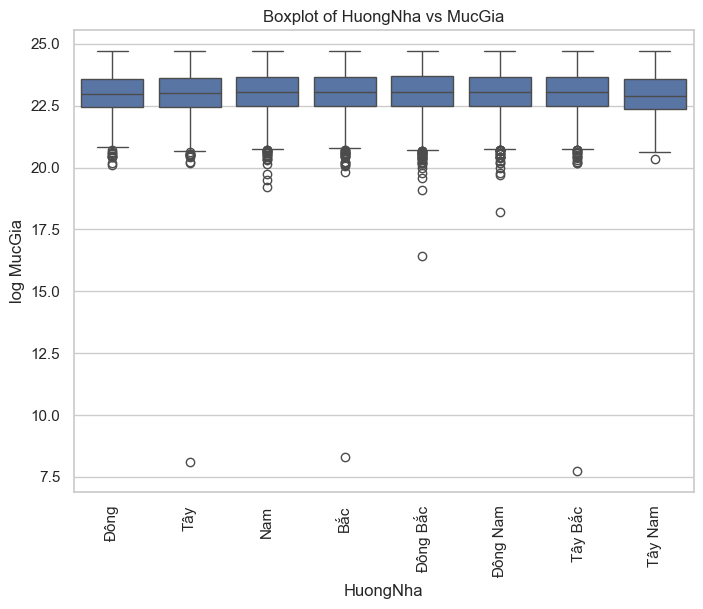

In [122]:
# Vẽ biểu đồ thể hiện sự ảnh hưởng của hướng nhà với giá nhà
mapping = {
    1: 'Đông',
    2: 'Tây',
    3: 'Nam',
    4: 'Bắc',
    5: 'Đông Bắc',
    6: 'Đông Nam',
    7: 'Tây Bắc',
    8: 'Tây Nam'
}

boxplot('HuongNha', use_log=True, mapping=mapping, order=list(mapping.values()))

Nhận xét:
* Các hộp (box) của từng nhóm Hướng Nhà đều nằm trong khoảng giá trị khá tương đồng, cụ thể trung vị (median) tập trung quanh mức ~22.5 (theo thang log).
* Điều này cho thấy Hướng Nhà không tạo ra sự khác biệt rõ rệt về giá trị bất động sản trong tập dữ liệu.
* Chiều rộng giữa các hộp và phần râu (whiskers) ở các nhóm gần bằng nhau, điều này cho thấy mức biến động của giá ở các hướng có xu hướng ổn định, không có nhóm nào chênh lệch.
* Xuất hiện một vài điểm ngoại lệ nằm dưới ngưỡng 20 (log MucGia), các bất động có mức giá thấp bất thường so với mặt bằng chung.
* Các ngoại lệ này phân bố ở hầu hết các hướng nhà, chứ không tập trung vào một hướng cụ thể, do đó có thể các mức giá ngoại lệ này còn ảnh hưởng bởi các yếu tố khác ngoài hướng nhà

=> Do các median gần bằng nhau và IQR tương đồng, có thể khẳng định rằng biến “Hướng Nhà” không phải là yếu tố quan trọng ảnh hưởng đến Mức Giá trong tập dữ liệu này.

## Trực quan hóa nội thất

C:\Users\quanp\AppData\Local\Temp\ipykernel_19872\1747253577.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


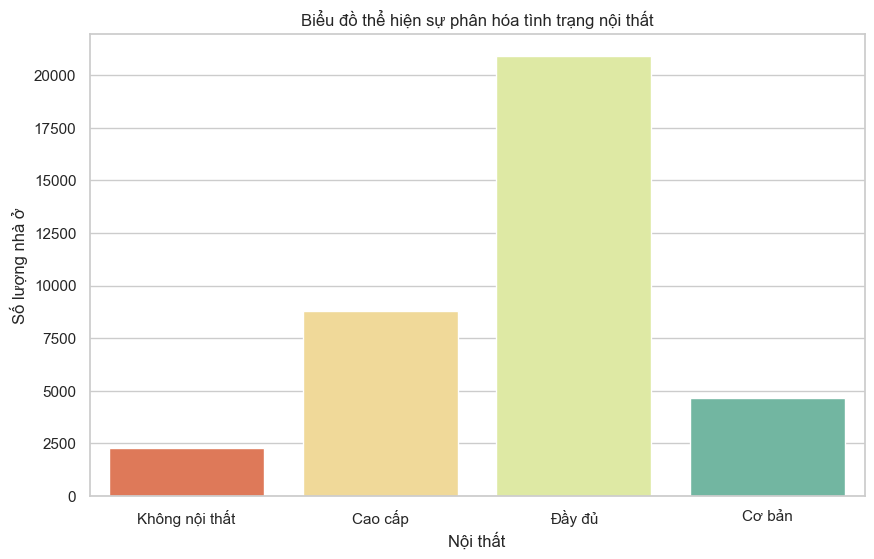

In [123]:
# Tính số lượng theo hướng nhà
NoiThat_counts = df_house['NoiThat'].value_counts().reset_index()
NoiThat_counts.columns = ['NoiThat', 'Count']

# Map số → tên nội thất
mapping = {
    0: 'Không nội thất',
    1: 'Cao cấp',
    2: 'Đầy đủ',
    3: 'Cơ bản'
}
NoiThat_counts['NoiThatLabel'] = NoiThat_counts['NoiThat'].map(mapping)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

ax = sns.barplot(
    x='NoiThatLabel',
    y='Count',
    data=NoiThat_counts,
    palette='Spectral',
    order=['Không nội thất', 'Cao cấp', 'Đầy đủ', 'Cơ bản']
)

plt.xlabel('Nội thất')
plt.ylabel('Số lượng nhà ở')
plt.title('Biểu đồ thể hiện sự phân hóa tình trạng nội thất')
plt.show()

In [124]:
# Đếm số lượng từng tình trạng nội thất
counts = df_house['NoiThat'].value_counts().sort_index()

# Map số sang tên hướng
mapping = {
    0: 'Không nội thất',
    1: 'Cao cấp',
    2: 'Đầy đủ',
    3: 'Cơ bản'
}

# In kết quả
for k, v in counts.items():
    print(f"{mapping.get(k, k)}: {v} căn nhà")

Không nội thất: 2253 căn nhà
Cao cấp: 8790 căn nhà
Đầy đủ: 20915 căn nhà
Cơ bản: 4675 căn nhà


Nhận xét:
* Nhóm chiếm tỷ trọng lớn nhất là nhà ở có nội thất đầy đủ, với 20915 căn. Điều này phản ánh xu hướng thị trường ưu tiên sự tiện nghi và sẵn sàng chi trả cho những căn hộ/housing đã được trang bị hoàn chỉnh, giúp người mua/thuê có thể sử dụng ngay mà không cần đầu tư thêm.
* Nhà ở nội thất cao cấp chiếm vị trí thứ hai với 8790 căn. Mặc dù nhỏ hơn với nội thất đầy đủ, nhưng cũng phản ánh xu hướng ưa chuộng của nhóm khách hàng cao cấp muốn có chất lượng sống tốt hơn.
* Nhà ở có nội thất cơ bản đứng ở mức trung bình, 4675 căn, những căn nhà giành cho các hộ gia đình có khả năng tài chính vừa phải, muốn tiết kiệm chi phí nhưng vẫn đáp ứng các tiện nghi cơ bản.
* Nhà ở không có nội thất chiếm tỷ lệ nhỏ nhất, chỉ 20915 căn. Điều này có thể cho thấy xu hướng giảm nhu cầu với loại hình này, người mua thường ưu tiên sự tiện lợi hơn là tự đầu tư cơ sở vật chất sau khi mua nhà.

Đánh giá tổng quát:
* Xu hướng nổi trội trên thị trường là sự ưu tiên dành cho các sản phẩm bất động sản được trang bị đầy đủ hoặc cao cấp về nội thất.
* Phân khúc cơ bản và không nội thất chiếm tỷ lệ nhỏ, chủ yếu phục vụ nhóm khách hàng có khả năng chi trả hạn chế hoặc có nhu cầu tự thiết kế nội thất theo sở thích.

## So sánh sự ảnh hưởng của tình trạng nội thất đến giá nhà

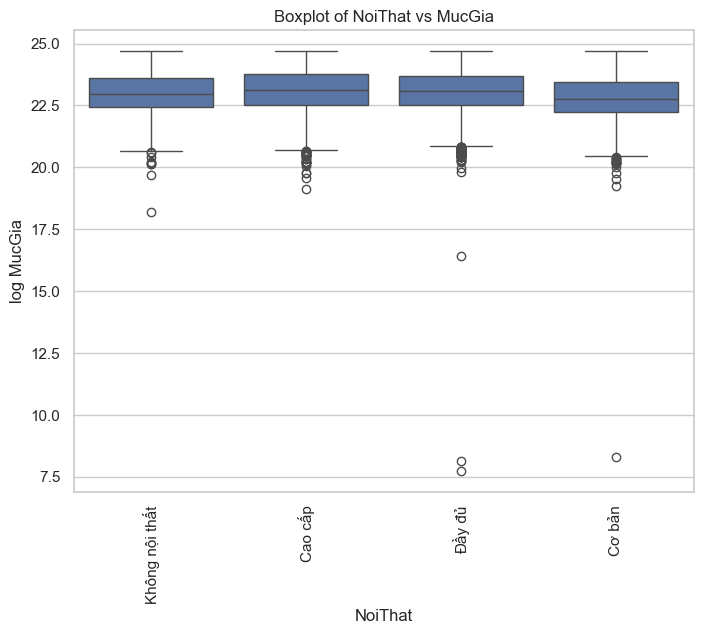

In [125]:
# Vẽ biểu đồ thể hiện sự ảnh hưởng của tình trạng nội thất với giá nhà
mapping = {
    0: 'Không nội thất',
    1: 'Cao cấp',
    2: 'Đầy đủ',
    3: 'Cơ bản'
}
boxplot('NoiThat', use_log=True, mapping=mapping, order=list(mapping.values()))

Nhận xét:
* Các nhóm "Cao cấp", "Đầy đủ", "Cơ bản" đều có giá trị trung vị khá tương đồng nhau, dao động quanh mức log(MucGia) khoảng 23.
* Nhóm "Không nội thất" có trung vị giá thấp hơn một chút, cho thấy không có nội thất có mức giá thấp hơn so với các nhóm còn lại.
* Các hộp (box) của 4 nhóm có phạm vi giá trị khá tương đồng nhau, cho thấy sự biến động giá trong từng nhóm không quá khác biệt.
* Tuy nhiên, nhóm "Cơ bản" và "Đầy đủ" có xu hướng phân tán rộng hơn một chút ở phía trên, phản ánh sự đa dạng về mức giá trong nhóm này.
* Tất cả các nhóm đều xuất hiện ngoại lệ ở mức giá thấp (log(MucGia) < 20), nhiều nhất ở nhóm "Đầy đủ". Điều này phản ánh các trường hợp đặc biệt, như các bất sản có nội thất đầy đủ nhưng nằm ở khu vực nông thôn, ngoại thành.
* Nhóm "Không nội thất" cũng có xuất hiện các ngoại lệ giá thấp, cho thấy bất động sản không có bất động sản thường gắn liền với mức giá thấp.

=>  Nhìn chung, tình trạng nội thất có ảnh hưởng nhất định đến giá bất động sản, nhưng sự khác biệt giữa các nhóm không quá rõ rệt. Việc có nội thất hay không quan trọng hơn mức độ phân loại "Cao cấp", "Đầy đủ" hay "Cơ bản". 

## Trực quan hóa pháp lý

C:\Users\quanp\AppData\Local\Temp\ipykernel_19872\624428813.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


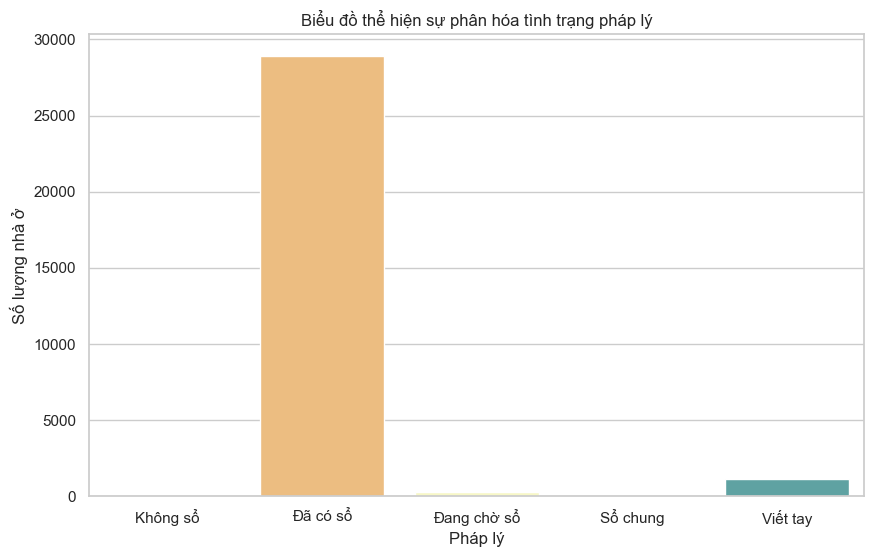

In [126]:
# Tính số lượng theo hướng nhà
PhapLy_counts = df_house['PhapLy'].value_counts().reset_index()
PhapLy_counts.columns = ['PhapLy', 'Count']

# Map số → tên pháp lý
mapping = {
    0: 'Không sổ',
    1: 'Đã có sổ',
    2: 'Đang chờ sổ',
    3: 'Sổ chung',
    4: 'Viết tay'
}
PhapLy_counts['PhapLyLabel'] = PhapLy_counts['PhapLy'].map(mapping)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

ax = sns.barplot(
    x='PhapLyLabel',
    y='Count',
    data=PhapLy_counts,
    palette='Spectral',
    order=['Không sổ', 'Đã có sổ', 'Đang chờ sổ', 'Sổ chung', 'Viết tay']
)

plt.xlabel('Pháp lý')
plt.ylabel('Số lượng nhà ở')
plt.title('Biểu đồ thể hiện sự phân hóa tình trạng pháp lý')
plt.show()

In [127]:
# Đếm số lượng từng tình trạng pháp lý
counts = df_house['PhapLy'].value_counts().sort_index()

# Map số sang tên hướng
mapping = {
    0: 'Không sổ',
    1: 'Đã có sổ',
    2: 'Đang chờ sổ',
    3: 'Sổ chung',
    4: 'Viết tay'
}

# In kết quả
for k, v in counts.items():
    print(f"{mapping.get(k, k)}: {v} căn nhà")

Không sổ: 26 căn nhà
Đã có sổ: 28893 căn nhà
Đang chờ sổ: 247 căn nhà
Sổ chung: 42 căn nhà
Viết tay: 1109 căn nhà


Nhận xét:
* Biểu đồ trên cho thấy sự phân hóa rõ rệt trong tình trạng pháp lý của nhà ở tại Việt Nam. Cụ thể, nhóm “Đã có sổ” chiếm ưu thế tuyệt đối với 28.893 căn, vượt trội so với các nhóm còn lại. Điều này phản ánh xu hướng người mua và chủ sở hữu ưu tiên các bất động sản có đầy đủ giấy tờ pháp lý, nhằm đảm bảo tính an toàn và minh bạch trong giao dịch.
* Ngược lại, số lượng nhà ở “Không sổ” (26 căn), “Sổ chung” (42 căn), và “Đang chờ sổ” (247 căn) ở mức rất thấp, cho thấy nhu cầu đối với các loại hình bất động sản này hạn chế do tiềm ẩn rủi ro về quyền sở hữu và tính pháp lý. Đáng chú ý, nhóm “Viết tay” vẫn tồn tại với 1.109 căn, phản ánh một bộ phận thị trường vẫn giao dịch dựa trên hình thức thỏa thuận cá nhân, mặc dù tính hợp pháp còn hạn chế và tiềm ẩn nhiều tranh chấp pháp lý.

=> Từ đó thấy, thị trường Việt Nam tập trung vào các loại hình nhà ở đã có sổ đỏ/ sổ hồng hợp pháp, trong khi các loại hình thiếu cơ sở pháp lý chỉ chiếm tỉ trọng nhỏ và đang biến mất dần. Điều này cho thấy tầm quan trọng của các yếu tố pháp lý trong niềm tin của nhà đầu tư và người tiêu dùng.

## So sánh sự ảnh hưởng của tình trạng pháp lý đến giá nhà

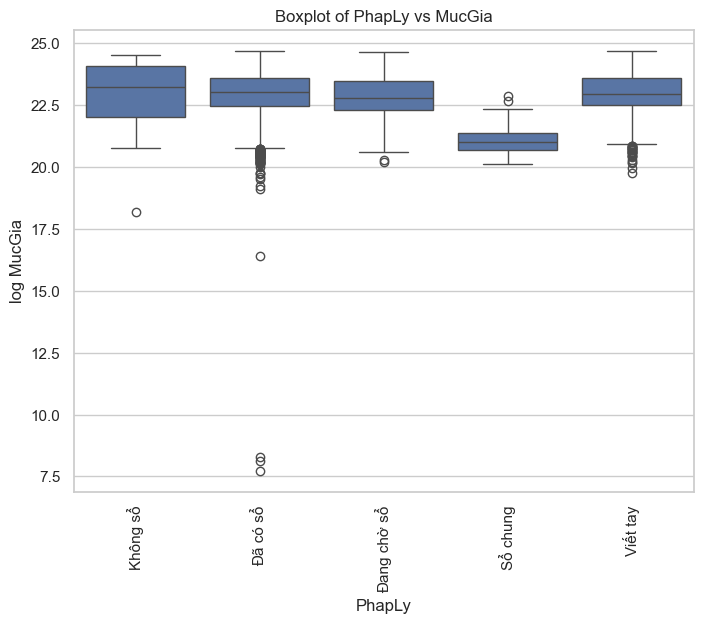

In [128]:
# Vẽ biểu đồ thể hiện sự ảnh hưởng của tình trạng pháp lý với giá nhà
mapping = {
    0: 'Không sổ',
    1: 'Đã có sổ',
    2: 'Đang chờ sổ',
    3: 'Sổ chung',
    4: 'Viết tay'
}
boxplot('PhapLy', use_log=True, mapping=mapping, order=list(mapping.values()))

Nhận xét:
* Nhà có sổ (Đã có sổ) và Viết tay có giá trung vị cao hơn so với các nhóm còn lại, cho thấy thị trường đánh giá cao các căn có tính pháp lý rõ ràng hoặc giấy tờ chuyển nhượng trực tiếp.
* Sổ chung có giá trung vị thấp nhất, phản ánh rủi ro pháp lý và hạn chế quyền sở hữu khiến giá trị bị giảm.
* Đang chờ sổ có giá trung vị tương đối cao, song thấp hơn so với nhóm Đã có sổ và Viết tay.
* Không sổ đang có giá trị trung vị cao nhất, có thể do các yếu tố khác ảnh hưởng như vị trí, diện tích,... hoặc có nhiều yếu tố chủ quan của người bán ở bên trong.

Mức độ phân tán giá:
* Các nhóm Đã có sổ và Viết tay có khoảng giá rộng, chứng tỏ thị trường phân hóa mạnh, có cả bất động sản cao cấp và trung cấp trong nhóm này.
* Ngược lại, Sổ chung có khoảng giá hẹp, phản ánh sự đồng nhất về mức giá do rào cản pháp lý làm hạn chế biên độ dao động.

Ngoại lệ (outlier):
* Xuất hiện nhiều giá trị outlier trong nhóm Đã có sổ và Viết tay, điều này cho thấy vẫn tồn tại những bất động sản giao dịch ở mức giá bất thường, có thể do vị trí và các yếu tố đặc thù khác.

=> Không sổ đang có khoảng giá khá cao, có thể đến từ yếu tố chủ quan hoặc do lượng dữ liệu của nhóm không đủ để có thể phản ánh được.Tuy nhiên phần lớn kết quả phản ánh tình trạng pháp lý là một yếu tố quan trọng ảnh hưởng đến giá nhà ở. Các căn có pháp lý minh bạch, đặc biệt là đã có sổ, thường được định giá cao hơn do giảm thiểu rủi ro pháp lý. Ngược lại, những căn có pháp lý không rõ ràng, đặc biệt là sổ chung, bị thị trường định giá thấp hơn đáng kể.

## Trực quan hóa địa chỉ

In [129]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '../../Modules/Preprocessing'))
from ConvertModules import address_convert as ac

In [130]:
# Tạo data frame để trực quan hóa địa chỉ
df_address = df_house.copy()

# Áp dụng hàm chuyển đổi vào bản sao của DataFrame
df_address['Ward'] = df_address[['City','District','Ward']].apply(lambda row:ac.ward_deconvert(row['City'],row['District'],row['Ward']),axis=1)
df_address['District'] = df_address[['City','District']].apply(lambda row: ac.area_deconvert(row['City'],row['District']),axis=1)
df_address['City'] = df_address['City'].apply(ac.region_deconvert)

C:\Users\quanp\AppData\Local\Temp\ipykernel_19872\2441890524.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_counts, x='City', y='Count', palette='viridis')


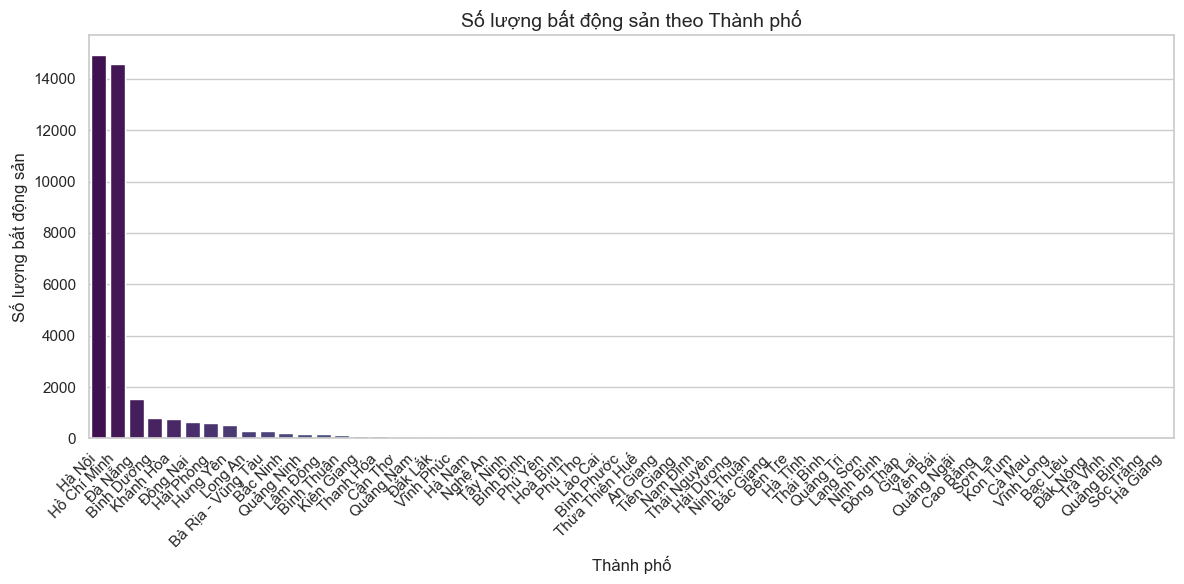

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Đếm số lượng theo City
city_counts = df_address['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(data=city_counts, x='City', y='Count', palette='viridis')

# Thêm nhãn và tiêu đề
plt.xlabel("Thành phố", fontsize=12)
plt.ylabel("Số lượng bất động sản", fontsize=12)
plt.title("Số lượng bất động sản theo Thành phố", fontsize=14)

# Xoay nhãn trên trục X để dễ đọc
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [132]:
# Đếm số lượng từng thành phố
city_counts = df_address['City'].value_counts().sort_values(ascending=False)
city_counts

City
Hà Nội               14949
Hồ Chí Minh          14588
Đà Nẵng               1544
Bình Dương             804
Khánh Hòa              767
Đồng Nai               636
Hải Phòng              616
Hưng Yên               531
Long An                303
Bà Rịa - Vũng Tàu      273
Bắc Ninh               211
Quảng Ninh             179
Lâm Đồng               178
Bình Thuận             132
Kiên Giang             108
Thanh Hóa               87
Cần Thơ                 76
Quảng Nam               76
Đắk Lắk                 53
Vĩnh Phúc               50
Hà Nam                  44
Nghệ An                 36
Tây Ninh                36
Bình Định               34
Phú Yên                 29
Hoà Bình                29
Phú Thọ                 27
Lào Cai                 25
Bình Phước              18
Thừa Thiên Huế          17
An Giang                15
Tiền Giang              14
Nam Định                13
Thái Nguyên             13
Hải Dương               13
Ninh Thuận              12
Bắc Giang              

Nhận xét:
* Bất động sản Tập trung chủ yếu ở hai đô thị lớn nhất Việt Nam: Hà Nội(14949) và Thành phố Hồ Chí Minh(14588) chiếm tỉ lệ cao nhất, vượt xa các khu vực còn lại. Tổng số bất động sản tại hai thành phố này chiếm phần lớn toàn bộ dữ liệu, phản ánh vai trò trung tâm kinh tế – chính trị – văn hóa và mức độ phát triển đô thị vượt trội so với cả nước.
* Đà Nẵng (1.544), Bình Dương (804), Khánh Hòa (767), Đồng Nai (636), Hải Phòng (616) cũng có số lượng bất động sản đáng kể. Đây là các trung tâm kinh tế, công nghiệp, du lịch lớn, nên cũng thu hút được lượng lớn đầu tư bất động sản.
* Sau các khu vực trên, số lượng bất động sản sụt giảm mạnh. Các tỉnh thành chỉ xuất hiện vài trăm bất động sản giao dịch (như Hưng Yên, Long An, Bà Rịa – Vũng Tàu, Bắc Ninh). Trong khi đó, vẫn có nhiều địa phương như Quảng Bình, Sóc Trăng, Hà Giang, Đắk Nông chỉ có 1-2 bất động sản, cho thấy thị trường mua bán ở các khu vực đó rất hạn chế.

Ý nghĩa:
* Thị trường bất động sản Việt Nam tập trung cao ở hai khu vực đô thị lớn.
* Các trung tâm vùng (Đà Nẵng, Bình Dương, Khánh Hòa, Đồng Nai, Hải Phòng) cũng phát triển nhờ được khai thác du lịch hoặc 'vệ tinh' hỗ trợ phát triển lan tỏa từ các vùng trung tâm.
* Phần lớn các tỉnh còn lại chưa hình thành thị trường bất động sản thực sự phát triển.

=> sự phân hóa bất động sản theo thành phố cho thấy tính tập trung cao tại các trung tâm kinh tế lớn, trong khi phần lớn các tỉnh thành còn lại chỉ có quy mô thị trường nhỏ lẻ. Điều này phản ánh quy luật phát triển bất động sản gắn liền với mức độ đô thị hóa, công nghiệp hóa và sức hút đầu tư tại từng địa phương.

## So sánh sự ảnh hưởng của từng khu vực thành phố đến giá nhà

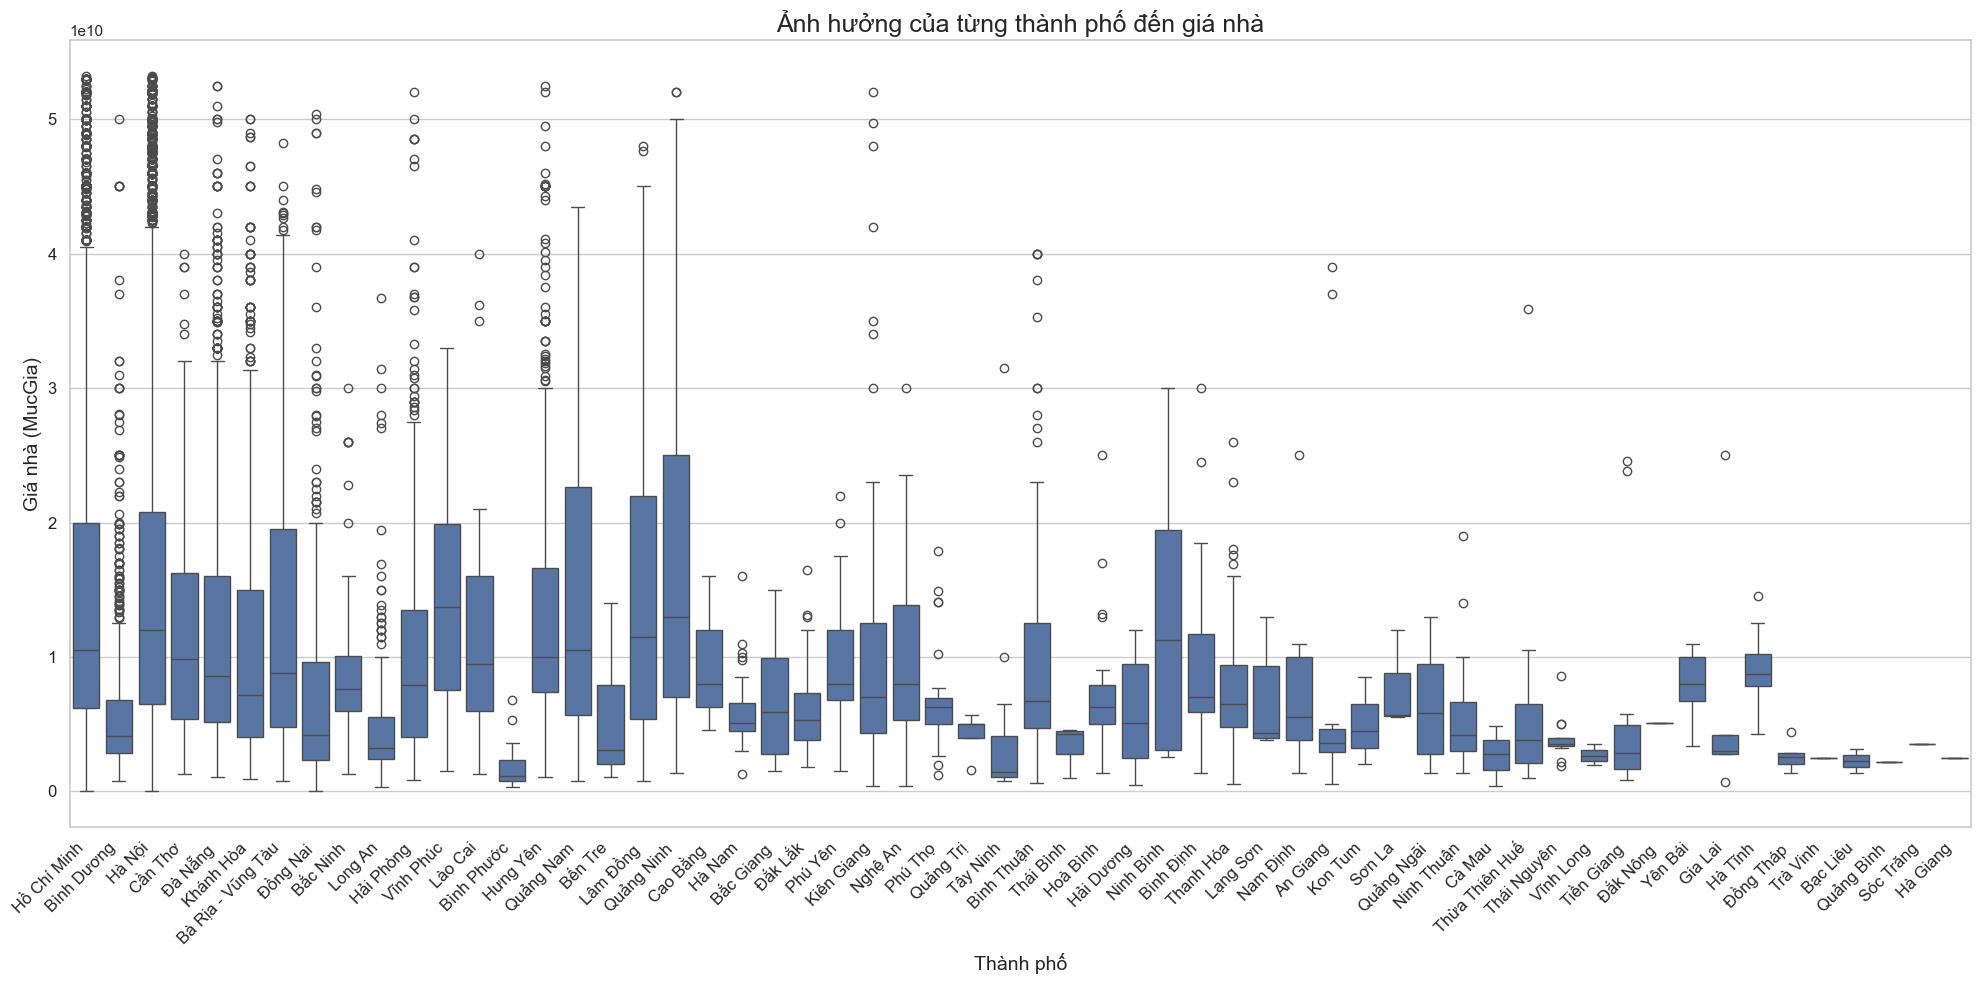

In [133]:
plt.figure(figsize=(20, 10))

sns.boxplot(data=df_address, x="City", y="MucGia")

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.title("Ảnh hưởng của từng thành phố đến giá nhà", fontsize=18)
plt.xlabel("Thành phố", fontsize=14)
plt.ylabel("Giá nhà (MucGia)", fontsize=14)

plt.tight_layout()
plt.show()

Nhận xét:
* TP. Hồ Chí Minh, Hà Nội, Đà Nẵng: có biên độ giá rất rộng, xuất hiện nhiều outlier (nhà siêu sang), thể hiện sự chênh lệch rõ rệt giữa các phân khúc.
* Bà Rịa - Vũng Tàu, Bình Dương, Quảng Ninh: mức giá trung bình khá cao, nhưng vẫn ổn định hơn so với TP lớn.
* Một số tỉnh miền Tây và miền núi (An Giang, Kiên Giang, Sóc Trăng, Hà Giang, Kon Tum, Gia Lai, …): giá nhà thấp hơn nhiều, ít biến động, số lượng outlier cũng ít.

=> Nhìn chung, các thành phố lớn và tỉnh ven biển phát triển du lịch/kinh tế có mức giá và độ phân tán cao hơn đáng kể.

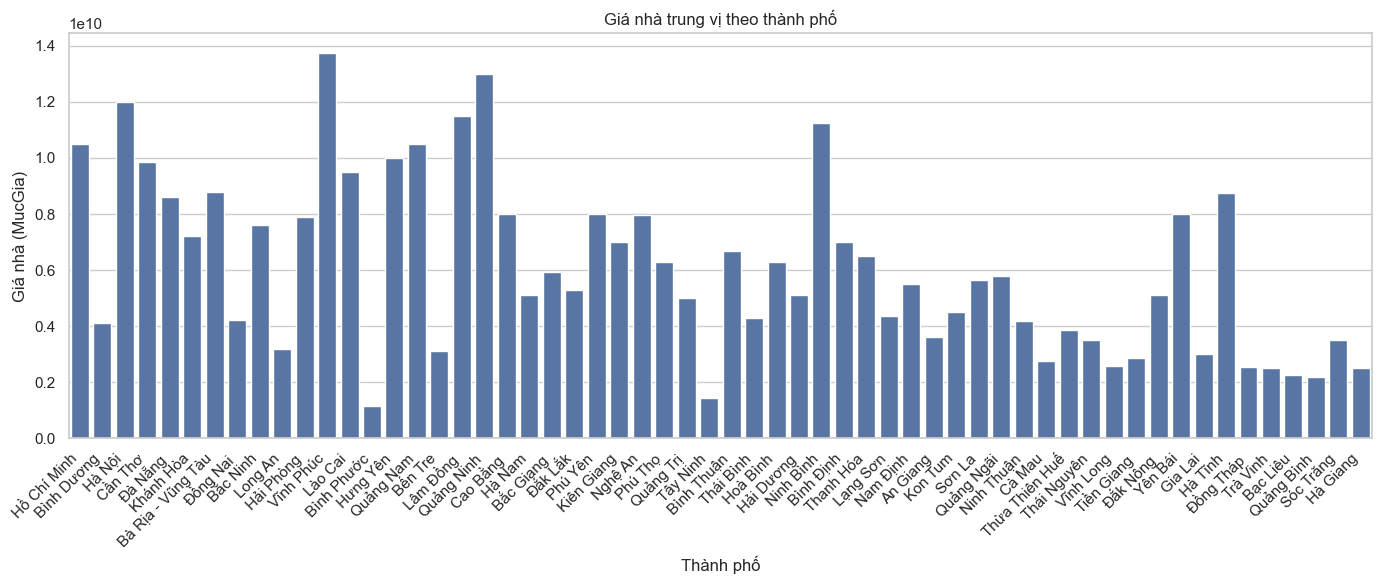

In [134]:
plt.figure(figsize=(14,6))
sns.barplot(data=df_address, x="City", y="MucGia", estimator="median", errorbar=None)
plt.xticks(rotation=45, ha="right")
plt.title("Giá nhà trung vị theo thành phố")
plt.xlabel("Thành phố")
plt.ylabel("Giá nhà (MucGia)")
plt.tight_layout()
plt.show()

Nhận xét:

Sự phân hóa rõ rệt theo khu vực:
* Các đô thị đặc biệt và thành phố lớn như TP. Hồ Chí Minh, Hà Nội, Đà Nẵng có mức giá trung vị cao hơn hẳn so với các tỉnh còn lại. Điều này phản ánh đúng tính chất tập trung dân cư, kinh tế và nhu cầu bất động sản tại các trung tâm đô thị.
* Một số tỉnh ven biển có thế mạnh về du lịch và nghỉ dưỡng (ví dụ: Khánh Hòa, Bà Rịa - Vũng Tàu, Quảng Ninh) cũng có mức giá trung vị cao, cho thấy ảnh hưởng của yếu tố địa lý và kinh tế du lịch.

Các tỉnh miền tây, vùng núi:
* Nhìn chung, các tỉnh thuộc vùng Tây Nguyên, Tây Bắc và Đồng bằng sông Cửu Long (ngoại trừ Cần Thơ) có mức giá trung vị thấp hơn đáng kể. Điều này phản ánh sức cầu và mật độ đô thị hóa thấp hơn, đồng thời cho thấy vai trò hạn chế của các khu vực này trên thị trường bất động sản quốc gia.

=> từ những điều trên ta có thể kết luận: Vị trí là yếu tố ảnh hưởng mạnh nhất đến giá nhà, thể hiện rõ sự chênh lệch giữa trung tâm kinh tế (Hà Nội, TP.HCM) và các tỉnh vùng xa (Hà Giang, Kon Tum)

## Trực quan hóa Quận/Huyện và Phường/Xã

Chọn Hồ Chí Minh là một trong các thị trường bất động sản sôi động nhất để xem mức phân hóa bất động sản dựa trên các quận, phường bên trong và mối quan hệ của chúng đối với mức giá.

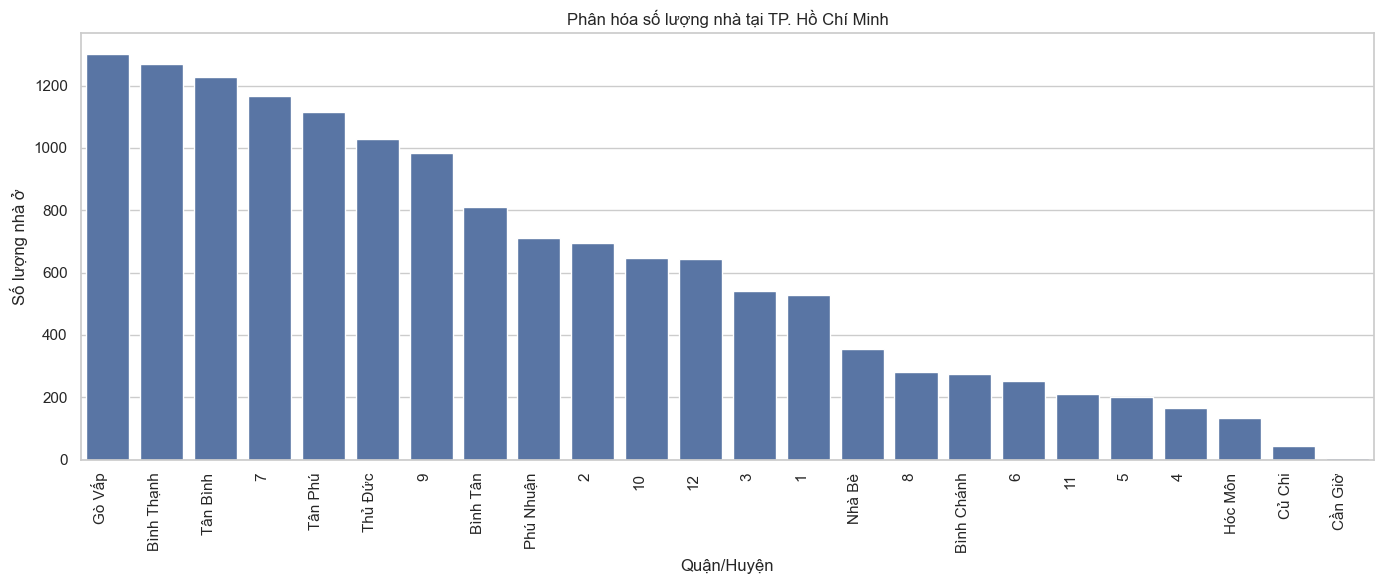

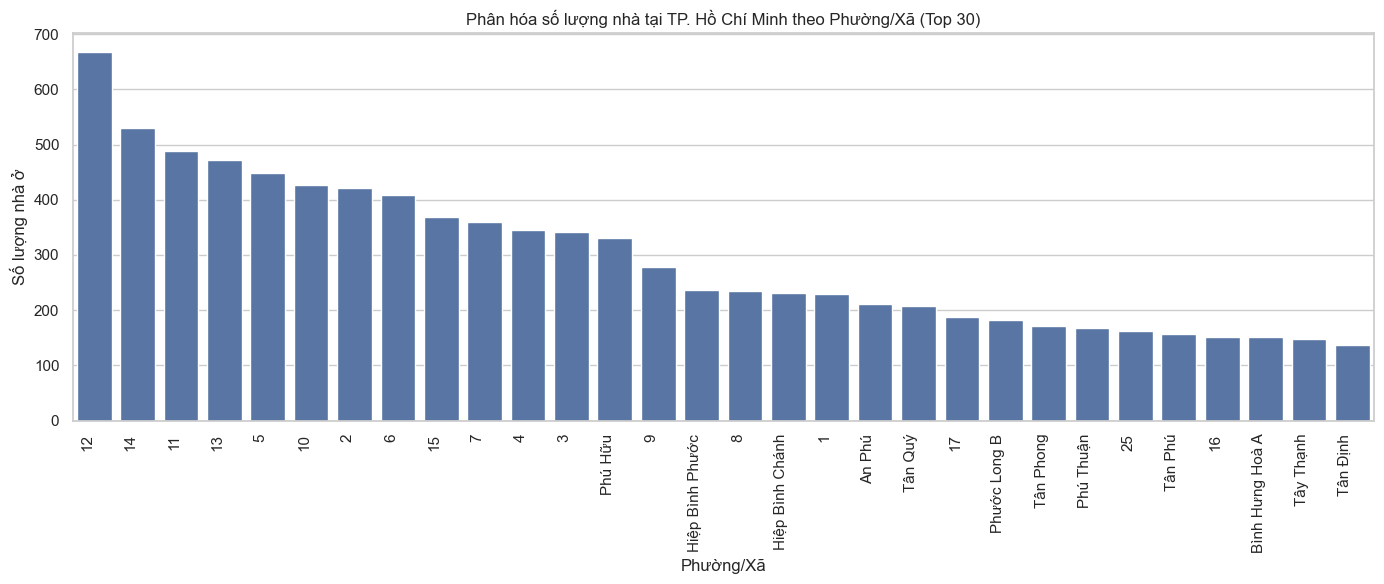

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lọc dữ liệu Hồ Chí Minh
df_hcm = df_address[df_address["City"] == "Hồ Chí Minh"]

plt.figure(figsize=(14,6))
sns.countplot(
    data=df_hcm, 
    x="District", 
    order=df_hcm['District'].value_counts().index
)
plt.xticks(rotation=90, ha="right")
plt.title("Phân hóa số lượng nhà tại TP. Hồ Chí Minh")
plt.xlabel("Quận/Huyện")
plt.ylabel("Số lượng nhà ở")
plt.tight_layout()
plt.show()


# Vẽ biểu đồ số lượng Ward
plt.figure(figsize=(14,6))
sns.countplot(data=df_hcm, x="Ward", order=df_hcm['Ward'].value_counts().index[:30])  # hiển thị top 30 phường nhiều nhất
plt.xticks(rotation=90, ha="right")
plt.title("Phân hóa số lượng nhà tại TP. Hồ Chí Minh theo Phường/Xã (Top 30)")
plt.xlabel("Phường/Xã")
plt.ylabel("Số lượng nhà ở")
plt.tight_layout()
plt.show()

In [136]:
district_counts = df_hcm['District'].value_counts().sort_values(ascending=False)
district_counts

District
Gò Vấp        1302
Bình Thạnh    1269
Tân Bình      1226
7             1168
Tân Phú       1115
Thủ Đức       1028
9              984
Bình Tân       809
Phú Nhuận      712
2              695
10             646
12             643
3              541
1              528
Nhà Bè         354
8              282
Bình Chánh     273
6              253
11             210
5              201
4              166
Hóc Môn        134
Củ Chi          44
Cần Giờ          5
Name: count, dtype: int64

In [137]:
top_30_wards = df_hcm['Ward'].value_counts().head(30)
top_30_wards

Ward
12                 668
14                 530
11                 488
13                 472
5                  449
10                 426
2                  422
6                  409
15                 368
7                  360
4                  345
3                  342
Phú Hữu            331
9                  279
Hiệp Bình Phước    237
8                  235
Hiệp Bình Chánh    231
1                  230
An Phú             212
Tân Quý            208
17                 188
Phước Long B       182
Tân Phong          172
Phú Thuận          167
25                 162
Tân Phú            156
16                 152
Bình Hưng Hoà A    151
Tây Thạnh          148
Tân Định           137
Name: count, dtype: int64

Nhận xét:
* Phân hóa theo Quận/Huyện:
* Các quận có số lượng tin đăng cao: Gò Vấp (1302), Bình Thạnh (1269), Tân Bình (1226), Quận 7 (1168), Tân Phú (1115), Thủ Đức (1028).

-> Đây là những khu vực tập trung nhiều tin đăng, có thể do mật độ dân cư cao, hoạt động mua bán bất động sản sôi động, hoặc sự phát triển đô thị mạnh mẽ.
* Các quận có số lượng trung bình: Quận 9, Bình Tân, Phú Nhuận, Quận 2, Quận 10, Quận 12.

-> Đây vẫn là khu vực đô thị hóa tốt nhưng không quá tập trung như các quận trên.

* Các huyện ngoại thành ít tin đăng: Nhà Bè, Bình Chánh, Hóc Môn, Củ Chi, Cần Giờ.
-> Số lượng nhà ở ít, thị trường giao dịch kém sôi động hơn, do khoảng cách xa trung tâm và hạ tầng chưa phát triển đồng bộ.

=> Phân hóa số lượng nhà ở theo Quận/Huyện khá rõ, tập trung mạnh ở các quận nội thành gần trung tâm và giảm dần về phía ngoại thành.

* Phân hóa theo Phường/Xã (Top 30):
* Phường có số lượng cao nhất: Phường 12 (668), Phường 14 (530), Phường 11 (488), Phường 13 (472), Phường 5 (449).

-> Đây đa số là các phường thuộc quận trung tâm hoặc quận có mật độ dân cư lớn như Gò Vấp, Bình Thạnh, Tân Bình.
* Các phường trung bình: nằm trong khoảng 300–400 tin đăng (Phường 7, Phường 4, Phường 3, Phú Hữu, Hiệp Bình Phước…).
* Các phường thấp hơn: 150–200 tin đăng (Phường 16, Bình Hưng Hòa A, Tây Thạnh, Tân Định…).

=> Tương tự như cấp Quận/Huyện, phân hóa tại Phường/Xã cũng tập trung nhiều ở các khu vực trung tâm, nơi có mật độ dân cư và hoạt động thương mại cao. Các phường vùng ven có số lượng tin đăng thấp, phản ánh ít nguồn cung nhà ở.

Tổng kết
* Số lượng nhà ở tập trung chủ yếu tại các quận trung tâm và cận trung tâm (Gò Vấp, Bình Thạnh, Tân Bình, Tân Phú, Quận 7, Thủ Đức).
* Các huyện ngoại thành ít nhà hơn, cho thấy thị trường bất động sản ở đây chưa phát triển mạnh.
* Phường/Xã phản ánh chi tiết hơn: những phường đông dân, hạ tầng phát triển (như Phường 12, 14, 11 ở Gò Vấp và Bình Thạnh) có số lượng tin đăng vượt trội.

=> Như vậy, sự phân hóa số lượng nhà theo khu vực rất rõ rệt, tập trung chủ yếu ở các quận trung tâm, từ đó cũng ảnh hưởng trực tiếp đến giá nhà và nhu cầu giao dịch ở từng khu vực.

## Kiểm tra mối quan hệ giữa các đặc trưng Quận/Huyện và Phường/Xã đối với mức giá

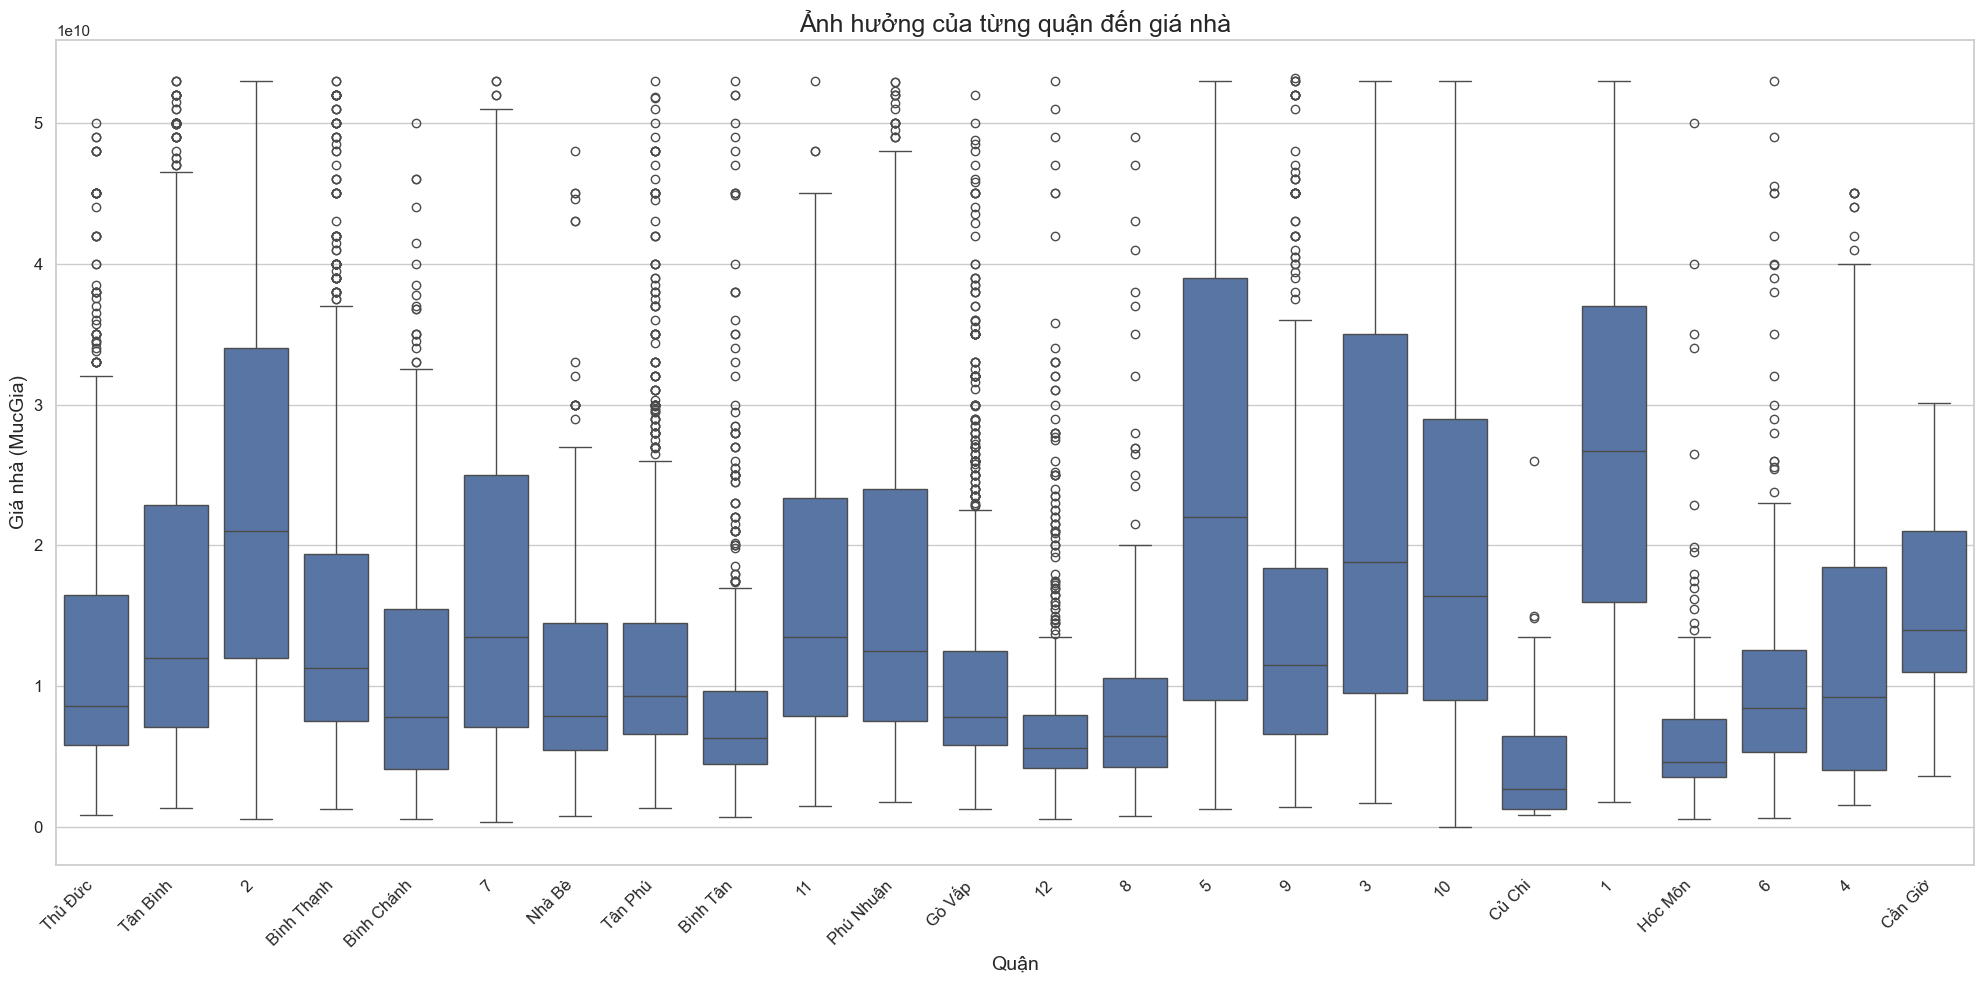

In [138]:
# Trực quan hóa giá nhà theo quận/huyện (box plot)
plt.figure(figsize=(20, 10))

sns.boxplot(data=df_hcm, x="District", y="MucGia")

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.title("Ảnh hưởng của từng quận đến giá nhà", fontsize=18)
plt.xlabel("Quận", fontsize=14)
plt.ylabel("Giá nhà (MucGia)", fontsize=14)

plt.tight_layout()
plt.show()

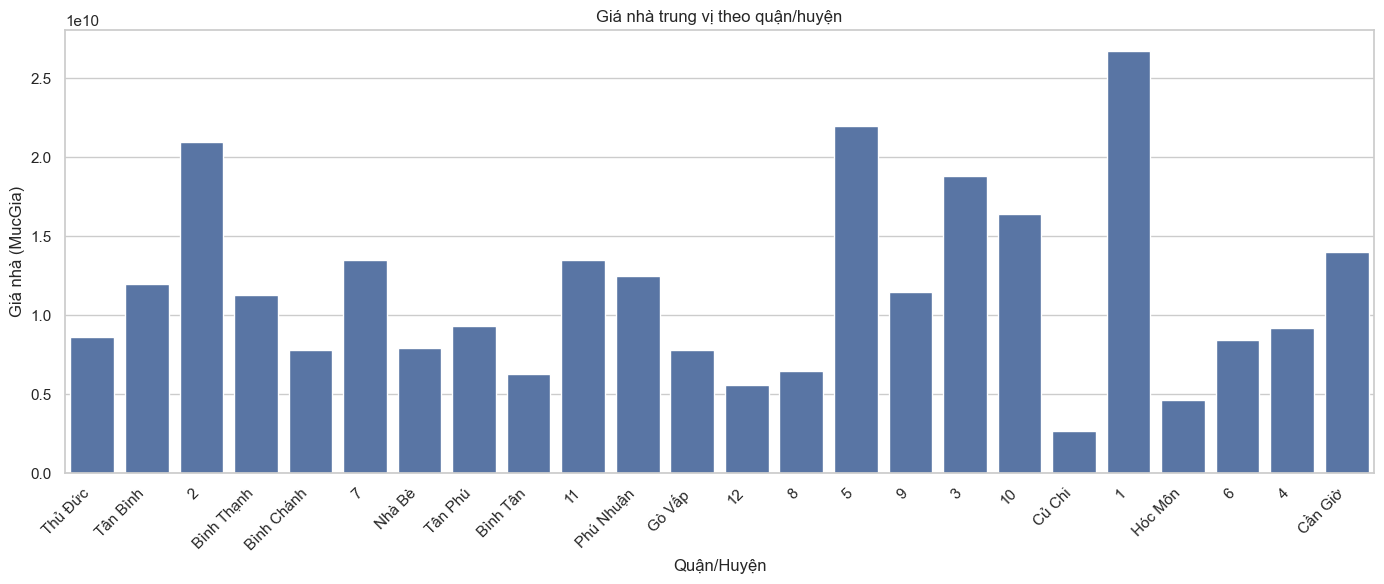

In [139]:
plt.figure(figsize=(14,6))
sns.barplot(data=df_hcm, x="District", y="MucGia", estimator="median", errorbar=None)
plt.xticks(rotation=45, ha="right")
plt.title("Giá nhà trung vị theo quận/huyện")
plt.xlabel("Quận/Huyện")
plt.ylabel("Giá nhà (MucGia)")
plt.tight_layout()
plt.show()

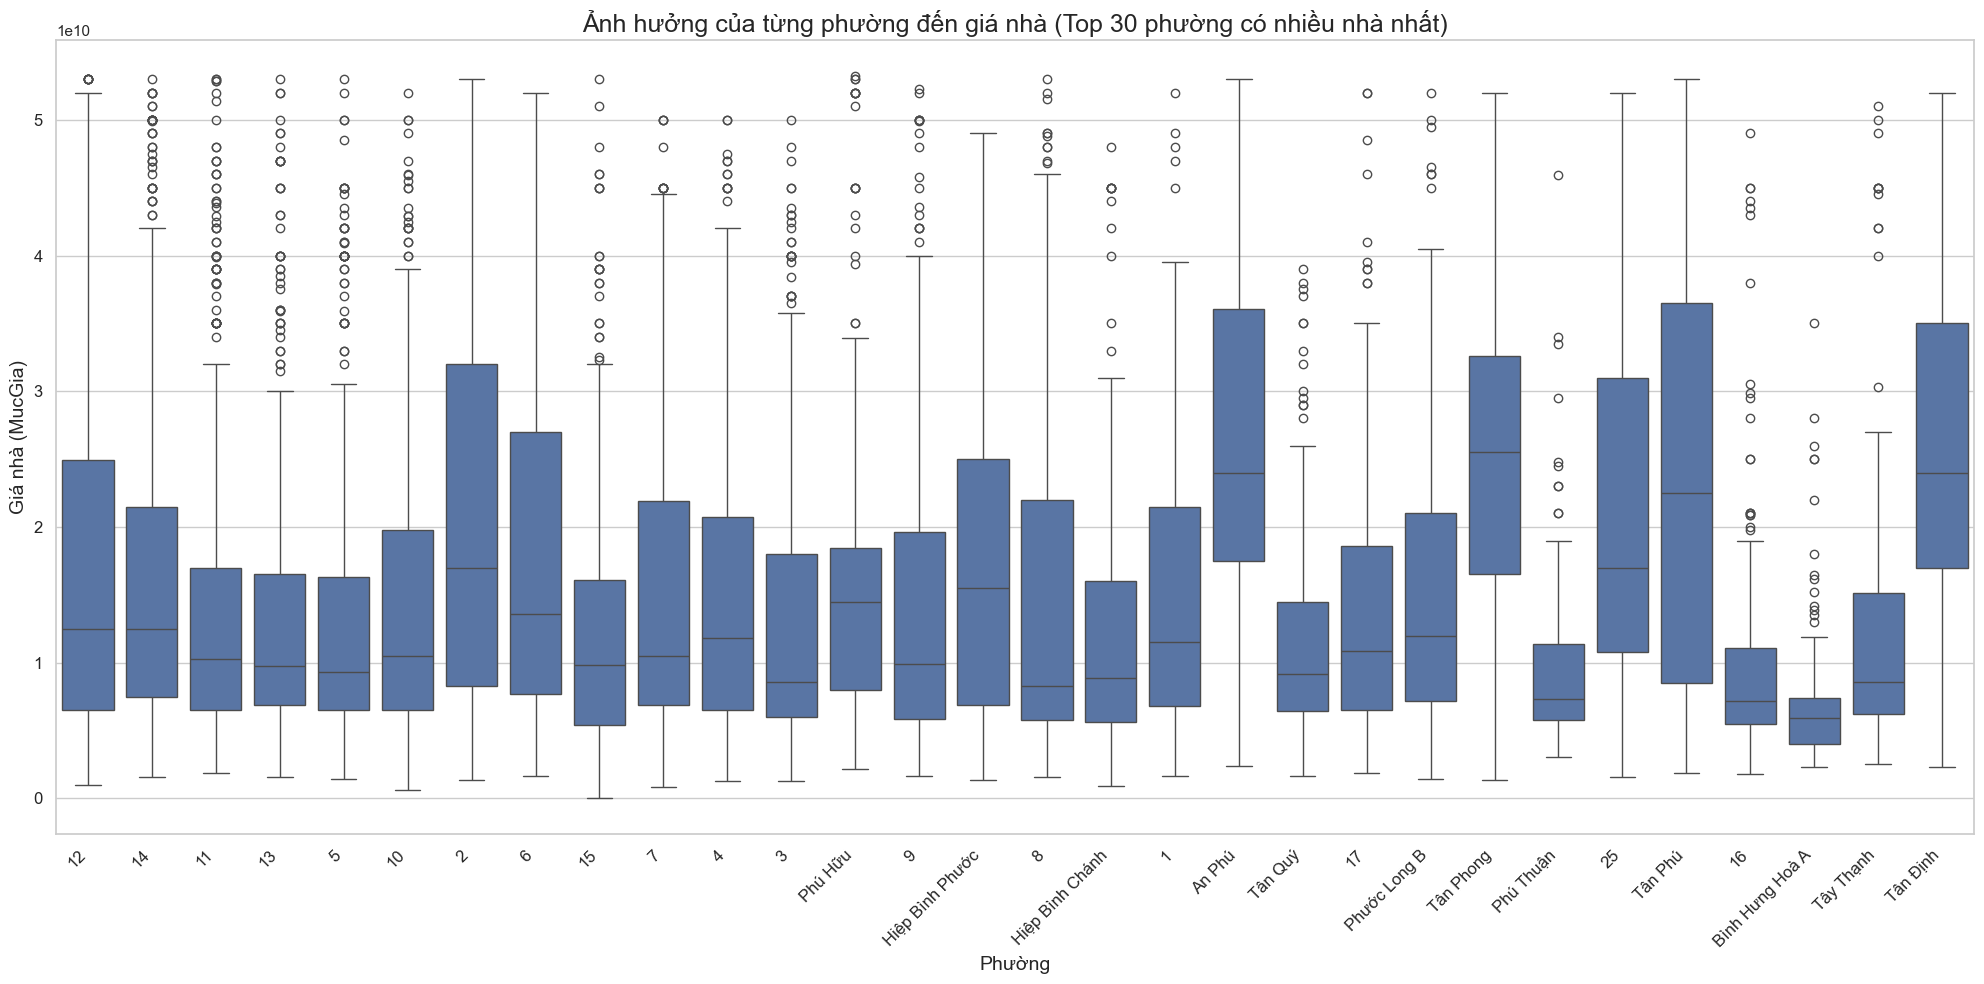

In [140]:
# Trực quan hóa giá nhà theo phường/xã (box plot)

# Lấy top 30 phường có nhiều nhà nhất
top_30_wards = df_hcm['Ward'].value_counts().head(30).index.tolist()

# Lọc dữ liệu chỉ cho top 30 phường
df_hcm_top30 = df_hcm[df_hcm['Ward'].isin(top_30_wards)]

# Vẽ boxplot cho top 30 phường
plt.figure(figsize=(20, 10))

sns.boxplot(data=df_hcm_top30, x="Ward", y="MucGia", order=top_30_wards)

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.title("Ảnh hưởng của từng phường đến giá nhà (Top 30 phường có nhiều nhà nhất)", fontsize=18)
plt.xlabel("Phường", fontsize=14)
plt.ylabel("Giá nhà (MucGia)", fontsize=14)

plt.tight_layout()
plt.show()

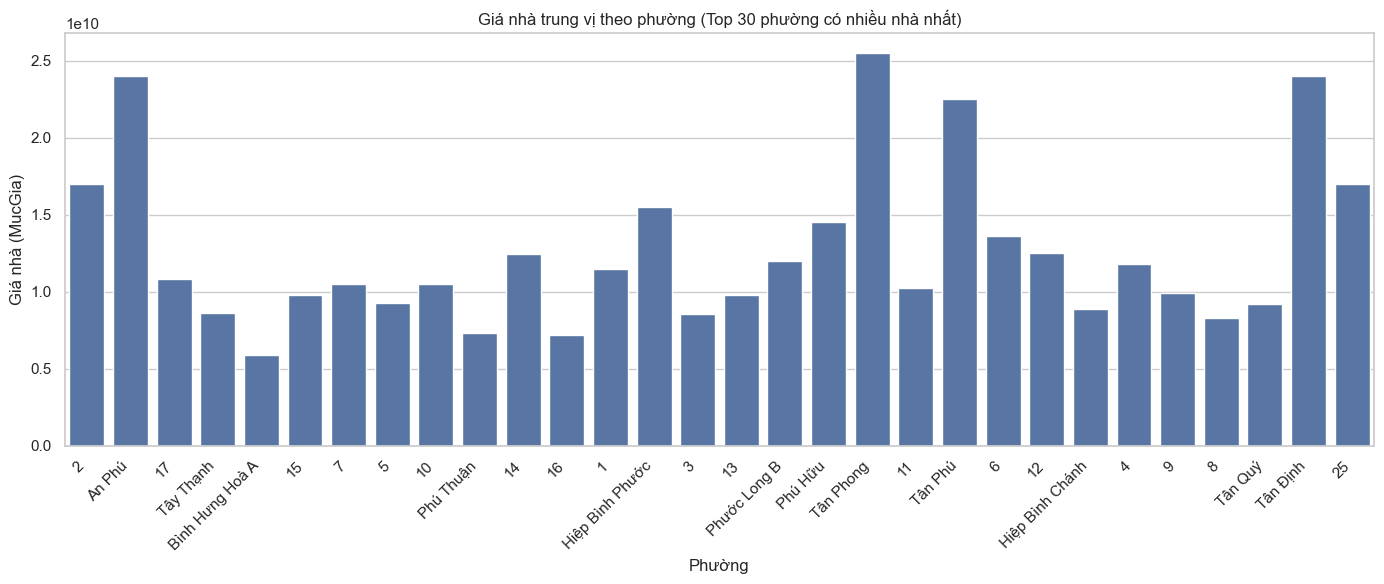

In [141]:
# Lấy top 30 phường có nhiều nhà nhất
top_30_wards = df_hcm['Ward'].value_counts().head(30).index.tolist()

# Lọc dữ liệu chỉ cho top 30 phường
df_hcm_top30 = df_hcm[df_hcm['Ward'].isin(top_30_wards)]

plt.figure(figsize=(14,6))
sns.barplot(data=df_hcm_top30, x="Ward", y="MucGia", estimator="median", errorbar=None)
plt.xticks(rotation=45, ha="right")
plt.title("Giá nhà trung vị theo phường (Top 30 phường có nhiều nhà nhất)")
plt.xlabel("Phường")
plt.ylabel("Giá nhà (MucGia)")
plt.tight_layout()
plt.show()

Ảnh hưởng của Quận/Huyện (District) đến giá nhà
* Phân tán giá: Biểu đồ boxplot cho thấy giá nhà ở các quận có sự phân tán khá lớn. Một số quận có khoảng giá dao động mạnh, ví dụ Quận 2, Quận 1, Quận 5 cho thấy mức độ đa dạng và sự xuất hiện của các bất động sản có giá cao.
* Trung vị giá nhà: Barplot chỉ ra rằng một số quận có giá trung vị cao vượt trội như Quận 2, Quận 1. Trong khi đó, các quận ngoại thành hoặc xa trung tâm như Củ Chi, Bình Chánh, Hóc Môn có giá thấp hơn đáng kể.
* Ý nghĩa: Quận/Huyện là đặc trưng quan trọng ảnh hưởng trực tiếp đến giá nhà, phản ánh vị trí địa lý, mức độ phát triển hạ tầng và giá trị thương mại – dịch vụ tại từng khu vực.

Ảnh hưởng của Phường/Xã (Ward) đến giá nhà
* Phân tán giá: Biểu đồ boxplot cho thấy mức giá trong từng phường cũng rất khác biệt. Một số phường như An Phú, Tân Định, Tân Phong có nhiều bất động sản cao cấp, dẫn đến giá trị trung vị và phân tán lớn.
* Trung vị giá nhà: Barplot thể hiện các phường trung tâm hoặc gắn với khu đô thị lớn (An Phú – Quận 2, Tân Phong – Quận 7, Tân Định – Quận 1) thường có giá trung vị cao nhất, vượt trội so với nhiều phường khác.
* Ý nghĩa thực tiễn: Ở cấp độ phường/xã, đặc trưng này còn thể hiện rõ hơn sự khác biệt trong cùng một quận. Ví dụ, trong cùng Quận 2, phường An Phú nổi bật hơn hẳn với mức giá cao do gắn với các khu đô thị lớn (Thảo Điền, An Phú – An Khánh).

Kết luận
* Cấp Quận/Huyện: Là đặc trưng quan trọng, cho thấy sự khác biệt giá nhà theo không gian đô thị – trung tâm càng gần khu vực phát triển (Quận 1, 2, 5) thì giá càng cao.
* Cấp Phường/Xã: Thể hiện chi tiết hơn sự khác biệt ngay trong cùng một quận, cho thấy vị trí cụ thể và môi trường sống ở phường có thể tạo ra sự chênh lệch giá đáng kể.

=> District và Ward đều có ảnh hưởng mạnh mẽ đến giá nhà, trong đó District phản ánh đặc trưng mức độ phát triển toàn khu vực, còn Ward phản ánh chi tiết chênh lệch bên trong.

## Kiểm tra mối quan hệ giữa các đặc trưng

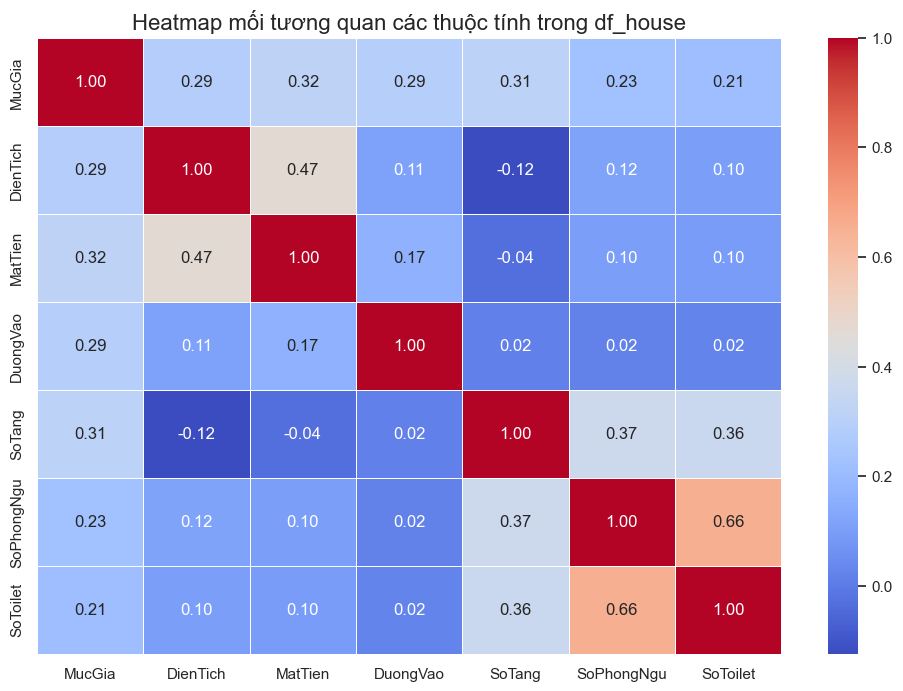

In [150]:
# vẽ heatmap với các cột không phải phân loại
cols = [
    'MucGia', 'DienTich', 'MatTien', 'DuongVao', 
    'SoTang', 'SoPhongNgu', 'SoToilet', 
]

plt.figure(figsize=(12, 8))

corr = df_house[cols].corr(numeric_only=True)

# Vẽ heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Heatmap mối tương quan các thuộc tính trong df_house", fontsize=16)
plt.show()

Nhận xét:

Mối quan hệ với MucGia (giá nhà)
* DienTich (0.29), MatTien (0.32), DuongVao (0.29), SoTang (0.31) đều có tương quan dương nhẹ đến trung bình → giá nhà thường tăng khi diện tích, mặt tiền, đường vào lớn hơn hoặc số tầng nhiều hơn.
* SoPhongNgu (0.23) và SoToilet (0.21) cũng có tương quan dương nhưng khá thấp.

-> Các đặc trưng có độ tương quan với mức giá khá tương đồng nhau.

Quan hệ giữa các đặc trưng
* DienTich - MatTien (0.47): diện tích lớn thường đi kèm mặt tiền rộng.
* SoPhongNgu - SoToilet (0.66): Hiện nay xu hướng sẽ tích hợp toilet chung với phòng ngủ để mang đến sự tiện lợi, vì vậy có mối tương quan khá mạnh.
* SoTang - SoPhongNgu (0.37) và SoTang - SoToilet (0.36): nhà nhiều tầng thường có nhiều phòng ngủ và toilet hơn.

Các mối quan hệ yếu
* Ngoài MucGia, DuongVao hầu như không liên quan đến các đặc trưng khác (đa số ~ 0.02).
* DienTich với SoTang có hệ số âm nhẹ (-0.12), gợi ý rằng diện tích rộng thường là nhà thấp tầng (ví dụ biệt thự sân vườn), còn diện tích nhỏ thường xây cao tầng (nhà phố).

Kết luận
* Dự đoán giá (MucGia): có thể kết hợp sử dụng DienTich, MatTien, SoTang, DuongVao cùng với các đặc trưng phân loại để tăng độ chính xác cho mô hình.
* Quan hệ mạnh nhất trong dữ liệu: SoPhongNgu - SoToilet.